In [2]:
import os
import json
from pathlib import Path
import logging
import random
import math
from typing import List, Dict, Any
import numpy as np
import pandas as pd
import torch
import datasets
from datasets import load_dataset, Dataset, DatasetDict, load_from_disk
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer, DataCollatorWithPadding)
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

d:\Users\Azaze\miniconda3\envs\colab-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#import module for v2 training and reload to get latest changes
import train_codebert_v2 as tr_v2
import importlib
importlib.reload(tr_v2) 

TRAIN_PATH = 'task_b_training_set.parquet'
VAL_PATH = 'task_b_validation_set.parquet'

# v2 models don't use preprocessed tokenized datasets
TOKENIZED_DIR_512 = 'tokenized_datasets_512'
OUTPUT_DIR_512 = 'experiments/exp_best_strategy_512'

print(f" Training 'best_strategy_model' max_length 512, Sampler Off,  Loss: Weighted CE ")

tr_v2.run_experiment(
    train_path=TRAIN_PATH,
    val_path=VAL_PATH,
    output_dir=OUTPUT_DIR_512,
    tokenized_dir=TOKENIZED_DIR_512,
    epochs=2,
    batch_size=2,         
    grad_accum=16,        
    lr=2e-5,
    force_retokenize=False, 
)

--- AVVIO STRATEGIA OTTIMIZZATA (SAFE MODE) ---
Max Length: 512 | Sampler: OFF | Loss: Weighted CE | GPU: 3080 Friendly
Loading data from Progetto LLM4SE/SemEval-2026-Task13/task_B/task_b_training_set.parquet and Progetto LLM4SE/SemEval-2026-Task13/task_B/task_b_validation_set.parquet...
Computing class weights...
Class Weights calcolati: tensor([ 0.1028, 10.9213,  5.0544, 15.0065, 20.4107, 23.0968,  7.8600,  5.5453,
         5.5930,  9.8643,  4.2049])
Tokenizing data (single process to save RAM)...


Map: 100%|██████████| 100000/100000 [04:19<00:00, 384.69 examples/s]


Saving tokenized datasets to Progetto LLM4SE/SemEval-2026-Task13/task_B/tokenized_datasets_512...


Saving the dataset (1/1 shards): 100%|██████████| 100000/100000 [00:00<00:00, 293609.38 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting training...


  0%|          | 100/31250 [01:37<7:22:28,  1.17it/s]

{'loss': 1.0694, 'grad_norm': 3.588876962661743, 'learning_rate': 1.9936000000000004e-05, 'epoch': 0.01}


  1%|          | 200/31250 [03:02<7:15:49,  1.19it/s]

{'loss': 0.7733, 'grad_norm': 9.726056098937988, 'learning_rate': 1.987264e-05, 'epoch': 0.01}


  1%|          | 300/31250 [04:26<7:15:37,  1.18it/s]

{'loss': 0.6785, 'grad_norm': 10.159380912780762, 'learning_rate': 1.9809280000000002e-05, 'epoch': 0.02}


  1%|▏         | 400/31250 [05:51<7:07:31,  1.20it/s]

{'loss': 0.6419, 'grad_norm': 10.659789085388184, 'learning_rate': 1.974528e-05, 'epoch': 0.03}


  2%|▏         | 500/31250 [07:15<7:09:59,  1.19it/s]

{'loss': 0.606, 'grad_norm': 6.339578151702881, 'learning_rate': 1.9681280000000003e-05, 'epoch': 0.03}


  2%|▏         | 600/31250 [08:37<7:05:55,  1.20it/s]

{'loss': 0.5974, 'grad_norm': 4.080022811889648, 'learning_rate': 1.9617920000000002e-05, 'epoch': 0.04}


  2%|▏         | 700/31250 [10:02<7:09:14,  1.19it/s]

{'loss': 0.5656, 'grad_norm': 10.058416366577148, 'learning_rate': 1.955392e-05, 'epoch': 0.04}


  3%|▎         | 800/31250 [11:26<7:02:26,  1.20it/s]

{'loss': 0.5485, 'grad_norm': 8.585874557495117, 'learning_rate': 1.9489920000000003e-05, 'epoch': 0.05}


  3%|▎         | 900/31250 [12:51<6:59:16,  1.21it/s]

{'loss': 0.5575, 'grad_norm': 11.692299842834473, 'learning_rate': 1.942592e-05, 'epoch': 0.06}


  3%|▎         | 1000/31250 [14:15<7:09:07,  1.17it/s]

{'loss': 0.5526, 'grad_norm': 11.082748413085938, 'learning_rate': 1.936192e-05, 'epoch': 0.06}



  3%|▎         | 1000/31250 [22:01<7:09:07,  1.17it/s]

{'eval_loss': 0.8275393843650818, 'eval_accuracy': 0.90097, 'eval_f1': 0.24808674721787644, 'eval_precision': 0.2457693147825684, 'eval_recall': 0.2919237741510045, 'eval_runtime': 466.315, 'eval_samples_per_second': 214.447, 'eval_steps_per_second': 53.612, 'epoch': 0.06}


  4%|▎         | 1100/31250 [23:29<6:48:36,  1.23it/s]    

{'loss': 0.5012, 'grad_norm': 7.648944854736328, 'learning_rate': 1.9297920000000002e-05, 'epoch': 0.07}


  4%|▍         | 1200/31250 [24:53<6:59:23,  1.19it/s]

{'loss': 0.5063, 'grad_norm': 3.784665584564209, 'learning_rate': 1.923392e-05, 'epoch': 0.08}


  4%|▍         | 1300/31250 [26:17<6:56:35,  1.20it/s]

{'loss': 0.494, 'grad_norm': 11.258169174194336, 'learning_rate': 1.9169920000000002e-05, 'epoch': 0.08}


  4%|▍         | 1400/31250 [27:40<7:03:59,  1.17it/s]

{'loss': 0.5217, 'grad_norm': 2.2008564472198486, 'learning_rate': 1.910592e-05, 'epoch': 0.09}


  5%|▍         | 1500/31250 [29:04<6:54:55,  1.20it/s]

{'loss': 0.5138, 'grad_norm': 2.4238452911376953, 'learning_rate': 1.9041920000000003e-05, 'epoch': 0.1}


  5%|▌         | 1600/31250 [30:28<6:51:31,  1.20it/s]

{'loss': 0.4634, 'grad_norm': 3.691627264022827, 'learning_rate': 1.897792e-05, 'epoch': 0.1}


  5%|▌         | 1700/31250 [31:52<6:55:55,  1.18it/s]

{'loss': 0.5024, 'grad_norm': 7.786978721618652, 'learning_rate': 1.891392e-05, 'epoch': 0.11}


  6%|▌         | 1800/31250 [33:16<6:54:35,  1.18it/s]

{'loss': 0.5093, 'grad_norm': 3.5714166164398193, 'learning_rate': 1.8849920000000002e-05, 'epoch': 0.12}


  6%|▌         | 1900/31250 [34:40<6:56:03,  1.18it/s]

{'loss': 0.4689, 'grad_norm': 8.293628692626953, 'learning_rate': 1.878592e-05, 'epoch': 0.12}


  6%|▋         | 2000/31250 [36:04<6:44:39,  1.20it/s]

{'loss': 0.4556, 'grad_norm': 6.896699905395508, 'learning_rate': 1.8721920000000003e-05, 'epoch': 0.13}



  6%|▋         | 2000/31250 [43:37<6:44:39,  1.20it/s]

{'eval_loss': 0.763160228729248, 'eval_accuracy': 0.91389, 'eval_f1': 0.2992917185675799, 'eval_precision': 0.4220366927203089, 'eval_recall': 0.32191066846612365, 'eval_runtime': 453.3013, 'eval_samples_per_second': 220.604, 'eval_steps_per_second': 55.151, 'epoch': 0.13}


  7%|▋         | 2100/31250 [45:07<6:31:21,  1.24it/s]    

{'loss': 0.461, 'grad_norm': 10.207771301269531, 'learning_rate': 1.865792e-05, 'epoch': 0.13}


  7%|▋         | 2200/31250 [46:29<6:47:20,  1.19it/s]

{'loss': 0.4725, 'grad_norm': 4.601556301116943, 'learning_rate': 1.859392e-05, 'epoch': 0.14}


  7%|▋         | 2300/31250 [47:54<6:36:21,  1.22it/s]

{'loss': 0.484, 'grad_norm': 8.343494415283203, 'learning_rate': 1.852992e-05, 'epoch': 0.15}


  8%|▊         | 2400/31250 [49:17<6:35:46,  1.21it/s]

{'loss': 0.4572, 'grad_norm': 1.7963333129882812, 'learning_rate': 1.846592e-05, 'epoch': 0.15}


  8%|▊         | 2500/31250 [50:41<6:36:54,  1.21it/s]

{'loss': 0.4471, 'grad_norm': 13.821444511413574, 'learning_rate': 1.8401920000000002e-05, 'epoch': 0.16}


  8%|▊         | 2600/31250 [52:05<6:38:45,  1.20it/s]

{'loss': 0.4482, 'grad_norm': 5.515777587890625, 'learning_rate': 1.833792e-05, 'epoch': 0.17}


  9%|▊         | 2700/31250 [53:30<6:48:51,  1.16it/s]

{'loss': 0.4637, 'grad_norm': 2.949437141418457, 'learning_rate': 1.827392e-05, 'epoch': 0.17}


  9%|▉         | 2800/31250 [54:54<6:44:45,  1.17it/s]

{'loss': 0.4628, 'grad_norm': 11.62917709350586, 'learning_rate': 1.820992e-05, 'epoch': 0.18}


  9%|▉         | 2900/31250 [56:18<6:38:35,  1.19it/s]

{'loss': 0.4185, 'grad_norm': 7.166677474975586, 'learning_rate': 1.814592e-05, 'epoch': 0.19}


 10%|▉         | 3000/31250 [57:42<6:39:08,  1.18it/s]

{'loss': 0.4369, 'grad_norm': 9.203886985778809, 'learning_rate': 1.8081920000000002e-05, 'epoch': 0.19}



 10%|▉         | 3000/31250 [1:05:10<6:39:08,  1.18it/s]

{'eval_loss': 0.7599986791610718, 'eval_accuracy': 0.91345, 'eval_f1': 0.32010772277357086, 'eval_precision': 0.36055466346742293, 'eval_recall': 0.3456087785244574, 'eval_runtime': 447.8789, 'eval_samples_per_second': 223.275, 'eval_steps_per_second': 55.819, 'epoch': 0.19}


 10%|▉         | 3100/31250 [1:06:40<6:34:23,  1.19it/s]    

{'loss': 0.4576, 'grad_norm': 7.026093006134033, 'learning_rate': 1.801792e-05, 'epoch': 0.2}


 10%|█         | 3200/31250 [1:08:04<6:32:30,  1.19it/s]

{'loss': 0.4544, 'grad_norm': 14.787971496582031, 'learning_rate': 1.7953920000000002e-05, 'epoch': 0.2}


 11%|█         | 3300/31250 [1:09:30<6:56:41,  1.12it/s]

{'loss': 0.4368, 'grad_norm': 11.146588325500488, 'learning_rate': 1.788992e-05, 'epoch': 0.21}


 11%|█         | 3400/31250 [1:10:54<6:33:19,  1.18it/s]

{'loss': 0.4613, 'grad_norm': 3.876677989959717, 'learning_rate': 1.782656e-05, 'epoch': 0.22}


 11%|█         | 3500/31250 [1:12:19<6:23:46,  1.21it/s]

{'loss': 0.4653, 'grad_norm': 7.917469024658203, 'learning_rate': 1.7762560000000002e-05, 'epoch': 0.22}


 12%|█▏        | 3600/31250 [1:13:42<6:22:49,  1.20it/s]

{'loss': 0.4137, 'grad_norm': 0.2674405872821808, 'learning_rate': 1.769856e-05, 'epoch': 0.23}


 12%|█▏        | 3700/31250 [1:15:06<6:24:31,  1.19it/s]

{'loss': 0.4158, 'grad_norm': 6.517749309539795, 'learning_rate': 1.763456e-05, 'epoch': 0.24}


 12%|█▏        | 3800/31250 [1:16:30<6:29:57,  1.17it/s]

{'loss': 0.4405, 'grad_norm': 3.7812771797180176, 'learning_rate': 1.757056e-05, 'epoch': 0.24}


 12%|█▏        | 3900/31250 [1:17:55<6:43:24,  1.13it/s]

{'loss': 0.4451, 'grad_norm': 6.495587348937988, 'learning_rate': 1.750656e-05, 'epoch': 0.25}


 13%|█▎        | 4000/31250 [1:19:19<6:08:44,  1.23it/s]

{'loss': 0.4105, 'grad_norm': 2.5740365982055664, 'learning_rate': 1.7442560000000002e-05, 'epoch': 0.26}



 13%|█▎        | 4000/31250 [1:27:10<6:08:44,  1.23it/s]

{'eval_loss': 0.695926308631897, 'eval_accuracy': 0.92395, 'eval_f1': 0.37742489801763895, 'eval_precision': 0.4270202170383765, 'eval_recall': 0.3805238209111186, 'eval_runtime': 470.7158, 'eval_samples_per_second': 212.442, 'eval_steps_per_second': 53.111, 'epoch': 0.26}


 13%|█▎        | 4100/31250 [1:28:41<6:28:10,  1.17it/s]    

{'loss': 0.4607, 'grad_norm': 8.176487922668457, 'learning_rate': 1.737856e-05, 'epoch': 0.26}


 13%|█▎        | 4200/31250 [1:30:07<6:18:22,  1.19it/s]

{'loss': 0.4466, 'grad_norm': 9.161019325256348, 'learning_rate': 1.7314560000000002e-05, 'epoch': 0.27}


 14%|█▍        | 4300/31250 [1:31:32<6:15:22,  1.20it/s]

{'loss': 0.4334, 'grad_norm': 1.9879010915756226, 'learning_rate': 1.725056e-05, 'epoch': 0.28}


 14%|█▍        | 4400/31250 [1:32:56<6:19:28,  1.18it/s]

{'loss': 0.4138, 'grad_norm': 6.785369396209717, 'learning_rate': 1.718656e-05, 'epoch': 0.28}


 14%|█▍        | 4500/31250 [1:34:21<6:16:30,  1.18it/s]

{'loss': 0.409, 'grad_norm': 12.252838134765625, 'learning_rate': 1.712256e-05, 'epoch': 0.29}


 15%|█▍        | 4600/31250 [1:35:46<6:17:23,  1.18it/s]

{'loss': 0.44, 'grad_norm': 11.127232551574707, 'learning_rate': 1.705856e-05, 'epoch': 0.29}


 15%|█▌        | 4700/31250 [1:37:10<6:09:55,  1.20it/s]

{'loss': 0.3816, 'grad_norm': 6.692383289337158, 'learning_rate': 1.69952e-05, 'epoch': 0.3}


 15%|█▌        | 4800/31250 [1:38:34<6:07:50,  1.20it/s]

{'loss': 0.4471, 'grad_norm': 4.796353816986084, 'learning_rate': 1.69312e-05, 'epoch': 0.31}


 16%|█▌        | 4900/31250 [1:39:58<6:04:37,  1.20it/s]

{'loss': 0.427, 'grad_norm': 7.4066596031188965, 'learning_rate': 1.68672e-05, 'epoch': 0.31}


 16%|█▌        | 5000/31250 [1:41:23<6:09:31,  1.18it/s]

{'loss': 0.3955, 'grad_norm': 9.772783279418945, 'learning_rate': 1.6803200000000002e-05, 'epoch': 0.32}



 16%|█▌        | 5000/31250 [1:48:56<6:09:31,  1.18it/s]

{'eval_loss': 0.6743918657302856, 'eval_accuracy': 0.92192, 'eval_f1': 0.37343429534191264, 'eval_precision': 0.5034611411300579, 'eval_recall': 0.399807193584964, 'eval_runtime': 452.8604, 'eval_samples_per_second': 220.819, 'eval_steps_per_second': 55.205, 'epoch': 0.32}


 16%|█▋        | 5100/31250 [1:50:26<6:02:28,  1.20it/s]    

{'loss': 0.3983, 'grad_norm': 5.142233848571777, 'learning_rate': 1.67392e-05, 'epoch': 0.33}


 17%|█▋        | 5200/31250 [1:51:51<6:01:23,  1.20it/s]

{'loss': 0.4269, 'grad_norm': 10.039618492126465, 'learning_rate': 1.66752e-05, 'epoch': 0.33}


 17%|█▋        | 5300/31250 [1:53:14<6:01:24,  1.20it/s]

{'loss': 0.3817, 'grad_norm': 4.302344799041748, 'learning_rate': 1.66112e-05, 'epoch': 0.34}


 17%|█▋        | 5400/31250 [1:54:38<6:07:44,  1.17it/s]

{'loss': 0.3992, 'grad_norm': 5.35338020324707, 'learning_rate': 1.65472e-05, 'epoch': 0.35}


 18%|█▊        | 5500/31250 [1:56:03<5:56:32,  1.20it/s]

{'loss': 0.4188, 'grad_norm': 2.725633382797241, 'learning_rate': 1.6483200000000002e-05, 'epoch': 0.35}


 18%|█▊        | 5600/31250 [1:57:27<6:03:36,  1.18it/s]

{'loss': 0.4118, 'grad_norm': 4.857168197631836, 'learning_rate': 1.64192e-05, 'epoch': 0.36}


 18%|█▊        | 5700/31250 [1:58:51<5:58:14,  1.19it/s]

{'loss': 0.3992, 'grad_norm': 5.27748966217041, 'learning_rate': 1.6355200000000002e-05, 'epoch': 0.36}


 19%|█▊        | 5800/31250 [2:00:16<5:54:16,  1.20it/s]

{'loss': 0.4519, 'grad_norm': 4.611837387084961, 'learning_rate': 1.62912e-05, 'epoch': 0.37}


 19%|█▉        | 5900/31250 [2:01:40<5:55:43,  1.19it/s]

{'loss': 0.3974, 'grad_norm': 4.571723937988281, 'learning_rate': 1.62272e-05, 'epoch': 0.38}


 19%|█▉        | 6000/31250 [2:03:04<5:51:04,  1.20it/s]

{'loss': 0.4351, 'grad_norm': 6.946172714233398, 'learning_rate': 1.61632e-05, 'epoch': 0.38}



 19%|█▉        | 6000/31250 [2:10:33<5:51:04,  1.20it/s]

{'eval_loss': 0.6582037210464478, 'eval_accuracy': 0.926, 'eval_f1': 0.41230609132467744, 'eval_precision': 0.4627951081696457, 'eval_recall': 0.4240433771683659, 'eval_runtime': 449.4566, 'eval_samples_per_second': 222.491, 'eval_steps_per_second': 55.623, 'epoch': 0.38}


 20%|█▉        | 6100/31250 [2:12:06<5:48:34,  1.20it/s]   

{'loss': 0.3843, 'grad_norm': 5.144568920135498, 'learning_rate': 1.60992e-05, 'epoch': 0.39}


 20%|█▉        | 6200/31250 [2:13:29<5:53:25,  1.18it/s]

{'loss': 0.4121, 'grad_norm': 7.418859004974365, 'learning_rate': 1.6035200000000002e-05, 'epoch': 0.4}


 20%|██        | 6300/31250 [2:14:54<5:49:32,  1.19it/s]

{'loss': 0.3973, 'grad_norm': 8.74112319946289, 'learning_rate': 1.597184e-05, 'epoch': 0.4}


 20%|██        | 6400/31250 [2:16:18<5:45:34,  1.20it/s]

{'loss': 0.3578, 'grad_norm': 6.847910404205322, 'learning_rate': 1.590784e-05, 'epoch': 0.41}


 21%|██        | 6500/31250 [2:17:41<5:46:06,  1.19it/s]

{'loss': 0.393, 'grad_norm': 2.5895049571990967, 'learning_rate': 1.5843840000000002e-05, 'epoch': 0.42}


 21%|██        | 6600/31250 [2:19:04<5:41:10,  1.20it/s]

{'loss': 0.4185, 'grad_norm': 6.4359331130981445, 'learning_rate': 1.577984e-05, 'epoch': 0.42}


 21%|██▏       | 6700/31250 [2:20:28<5:39:24,  1.21it/s]

{'loss': 0.3919, 'grad_norm': 18.025611877441406, 'learning_rate': 1.5715840000000002e-05, 'epoch': 0.43}


 22%|██▏       | 6800/31250 [2:21:52<5:38:35,  1.20it/s]

{'loss': 0.3952, 'grad_norm': 16.708560943603516, 'learning_rate': 1.565184e-05, 'epoch': 0.44}


 22%|██▏       | 6900/31250 [2:23:15<5:48:54,  1.16it/s]

{'loss': 0.404, 'grad_norm': 4.258420944213867, 'learning_rate': 1.558784e-05, 'epoch': 0.44}


 22%|██▏       | 7000/31250 [2:24:39<5:35:46,  1.20it/s]

{'loss': 0.3799, 'grad_norm': 5.372282028198242, 'learning_rate': 1.552384e-05, 'epoch': 0.45}



 22%|██▏       | 7000/31250 [2:31:58<5:35:46,  1.20it/s]

{'eval_loss': 0.6398412585258484, 'eval_accuracy': 0.92938, 'eval_f1': 0.45243117909265856, 'eval_precision': 0.46899907141648267, 'eval_recall': 0.4645946042138536, 'eval_runtime': 439.0063, 'eval_samples_per_second': 227.787, 'eval_steps_per_second': 56.947, 'epoch': 0.45}


 23%|██▎       | 7100/31250 [2:33:29<5:29:10,  1.22it/s]   

{'loss': 0.3703, 'grad_norm': 5.076718330383301, 'learning_rate': 1.545984e-05, 'epoch': 0.45}


 23%|██▎       | 7200/31250 [2:34:52<5:37:31,  1.19it/s]

{'loss': 0.3711, 'grad_norm': 6.240294456481934, 'learning_rate': 1.5395840000000002e-05, 'epoch': 0.46}


 23%|██▎       | 7300/31250 [2:36:16<5:29:20,  1.21it/s]

{'loss': 0.3955, 'grad_norm': 4.074767589569092, 'learning_rate': 1.5331840000000004e-05, 'epoch': 0.47}


 24%|██▎       | 7400/31250 [2:37:40<5:35:25,  1.19it/s]

{'loss': 0.4052, 'grad_norm': 10.286938667297363, 'learning_rate': 1.526784e-05, 'epoch': 0.47}


 24%|██▍       | 7500/31250 [2:39:04<5:30:43,  1.20it/s]

{'loss': 0.3919, 'grad_norm': 1.1506720781326294, 'learning_rate': 1.5203840000000001e-05, 'epoch': 0.48}


 24%|██▍       | 7600/31250 [2:40:27<5:42:20,  1.15it/s]

{'loss': 0.3926, 'grad_norm': 6.963217258453369, 'learning_rate': 1.5139840000000001e-05, 'epoch': 0.49}


 25%|██▍       | 7700/31250 [2:41:55<5:58:06,  1.10it/s]

{'loss': 0.3373, 'grad_norm': 11.614452362060547, 'learning_rate': 1.5075840000000002e-05, 'epoch': 0.49}


 25%|██▍       | 7800/31250 [2:43:25<5:45:37,  1.13it/s]

{'loss': 0.4134, 'grad_norm': 6.50282621383667, 'learning_rate': 1.5011840000000002e-05, 'epoch': 0.5}


 25%|██▌       | 7900/31250 [2:44:49<5:27:30,  1.19it/s]

{'loss': 0.3916, 'grad_norm': 2.681353807449341, 'learning_rate': 1.494784e-05, 'epoch': 0.51}


 26%|██▌       | 8000/31250 [2:46:12<5:28:47,  1.18it/s]

{'loss': 0.3754, 'grad_norm': 7.6278815269470215, 'learning_rate': 1.488384e-05, 'epoch': 0.51}



 26%|██▌       | 8000/31250 [2:53:49<5:28:47,  1.18it/s]

{'eval_loss': 0.6365504860877991, 'eval_accuracy': 0.92721, 'eval_f1': 0.4483994459918051, 'eval_precision': 0.46889377390770154, 'eval_recall': 0.4703406591053092, 'eval_runtime': 456.6334, 'eval_samples_per_second': 218.994, 'eval_steps_per_second': 54.749, 'epoch': 0.51}


 26%|██▌       | 8100/31250 [2:55:19<5:37:18,  1.14it/s]   

{'loss': 0.392, 'grad_norm': 3.353520393371582, 'learning_rate': 1.4819840000000001e-05, 'epoch': 0.52}


 26%|██▌       | 8200/31250 [2:56:44<5:22:19,  1.19it/s]

{'loss': 0.3956, 'grad_norm': 11.663914680480957, 'learning_rate': 1.4755840000000001e-05, 'epoch': 0.52}


 27%|██▋       | 8300/31250 [2:58:08<5:21:16,  1.19it/s]

{'loss': 0.3743, 'grad_norm': 16.315853118896484, 'learning_rate': 1.4691840000000002e-05, 'epoch': 0.53}


 27%|██▋       | 8400/31250 [2:59:32<5:23:25,  1.18it/s]

{'loss': 0.405, 'grad_norm': 7.409379482269287, 'learning_rate': 1.4627840000000002e-05, 'epoch': 0.54}


 27%|██▋       | 8500/31250 [3:00:56<5:19:38,  1.19it/s]

{'loss': 0.4036, 'grad_norm': 4.541121006011963, 'learning_rate': 1.456384e-05, 'epoch': 0.54}


 28%|██▊       | 8600/31250 [3:02:20<5:13:49,  1.20it/s]

{'loss': 0.4006, 'grad_norm': 4.458515167236328, 'learning_rate': 1.449984e-05, 'epoch': 0.55}


 28%|██▊       | 8700/31250 [3:03:44<5:16:38,  1.19it/s]

{'loss': 0.3821, 'grad_norm': 6.629558086395264, 'learning_rate': 1.4435840000000001e-05, 'epoch': 0.56}


 28%|██▊       | 8800/31250 [3:05:09<5:26:58,  1.14it/s]

{'loss': 0.364, 'grad_norm': 2.8218328952789307, 'learning_rate': 1.4371840000000001e-05, 'epoch': 0.56}


 28%|██▊       | 8900/31250 [3:06:33<5:18:37,  1.17it/s]

{'loss': 0.3671, 'grad_norm': 5.099016189575195, 'learning_rate': 1.4307840000000002e-05, 'epoch': 0.57}


 29%|██▉       | 9000/31250 [3:07:57<5:09:59,  1.20it/s]

{'loss': 0.3687, 'grad_norm': 5.722606658935547, 'learning_rate': 1.4243840000000002e-05, 'epoch': 0.58}



 29%|██▉       | 9000/31250 [3:15:25<5:09:59,  1.20it/s]

{'eval_loss': 0.6276460289955139, 'eval_accuracy': 0.92765, 'eval_f1': 0.457202134315083, 'eval_precision': 0.4837692600061908, 'eval_recall': 0.47104173773258146, 'eval_runtime': 448.0945, 'eval_samples_per_second': 223.167, 'eval_steps_per_second': 55.792, 'epoch': 0.58}


 29%|██▉       | 9100/31250 [3:16:55<5:08:14,  1.20it/s]   

{'loss': 0.3977, 'grad_norm': 3.015416383743286, 'learning_rate': 1.417984e-05, 'epoch': 0.58}


 29%|██▉       | 9200/31250 [3:18:20<5:16:35,  1.16it/s]

{'loss': 0.3644, 'grad_norm': 4.493711948394775, 'learning_rate': 1.411584e-05, 'epoch': 0.59}


 30%|██▉       | 9300/31250 [3:19:46<5:20:40,  1.14it/s]

{'loss': 0.367, 'grad_norm': 8.28905963897705, 'learning_rate': 1.4051840000000001e-05, 'epoch': 0.6}


 30%|███       | 9400/31250 [3:21:12<5:06:37,  1.19it/s]

{'loss': 0.3736, 'grad_norm': 3.059525728225708, 'learning_rate': 1.3987840000000001e-05, 'epoch': 0.6}


 30%|███       | 9500/31250 [3:22:36<5:01:18,  1.20it/s]

{'loss': 0.4238, 'grad_norm': 5.745616436004639, 'learning_rate': 1.3923840000000002e-05, 'epoch': 0.61}


 31%|███       | 9600/31250 [3:24:01<5:04:51,  1.18it/s]

{'loss': 0.4129, 'grad_norm': 15.26260757446289, 'learning_rate': 1.3859840000000002e-05, 'epoch': 0.61}


 31%|███       | 9700/31250 [3:25:24<5:03:34,  1.18it/s]

{'loss': 0.354, 'grad_norm': 3.9083046913146973, 'learning_rate': 1.379584e-05, 'epoch': 0.62}


 31%|███▏      | 9800/31250 [3:26:48<4:57:41,  1.20it/s]

{'loss': 0.3323, 'grad_norm': 7.978444576263428, 'learning_rate': 1.373184e-05, 'epoch': 0.63}


 32%|███▏      | 9900/31250 [3:28:12<5:01:10,  1.18it/s]

{'loss': 0.4059, 'grad_norm': 2.510721445083618, 'learning_rate': 1.3667840000000001e-05, 'epoch': 0.63}


 32%|███▏      | 10000/31250 [3:29:38<4:53:42,  1.21it/s]

{'loss': 0.3475, 'grad_norm': 5.7307305335998535, 'learning_rate': 1.3603840000000001e-05, 'epoch': 0.64}



 32%|███▏      | 10000/31250 [3:37:12<4:53:42,  1.21it/s]

{'eval_loss': 0.6172563433647156, 'eval_accuracy': 0.93332, 'eval_f1': 0.4810569029466691, 'eval_precision': 0.5457164709992707, 'eval_recall': 0.4710715304796802, 'eval_runtime': 453.9537, 'eval_samples_per_second': 220.287, 'eval_steps_per_second': 55.072, 'epoch': 0.64}


 32%|███▏      | 10100/31250 [3:38:43<4:54:53,  1.20it/s]   

{'loss': 0.3855, 'grad_norm': 4.691608428955078, 'learning_rate': 1.3539840000000001e-05, 'epoch': 0.65}


 33%|███▎      | 10200/31250 [3:40:07<4:54:38,  1.19it/s]

{'loss': 0.3242, 'grad_norm': 12.096160888671875, 'learning_rate': 1.347584e-05, 'epoch': 0.65}


 33%|███▎      | 10300/31250 [3:41:32<4:49:58,  1.20it/s]

{'loss': 0.3717, 'grad_norm': 6.685293197631836, 'learning_rate': 1.341184e-05, 'epoch': 0.66}


 33%|███▎      | 10400/31250 [3:42:56<4:56:26,  1.17it/s]

{'loss': 0.3559, 'grad_norm': 6.014255523681641, 'learning_rate': 1.334784e-05, 'epoch': 0.67}


 34%|███▎      | 10500/31250 [3:44:21<4:56:26,  1.17it/s]

{'loss': 0.3734, 'grad_norm': 12.969701766967773, 'learning_rate': 1.3283840000000001e-05, 'epoch': 0.67}


 34%|███▍      | 10600/31250 [3:45:45<4:49:33,  1.19it/s]

{'loss': 0.3748, 'grad_norm': 6.1590118408203125, 'learning_rate': 1.3219840000000001e-05, 'epoch': 0.68}


 34%|███▍      | 10700/31250 [3:47:11<4:44:43,  1.20it/s]

{'loss': 0.3258, 'grad_norm': 5.76254940032959, 'learning_rate': 1.3155840000000001e-05, 'epoch': 0.68}


 35%|███▍      | 10800/31250 [3:48:36<4:52:44,  1.16it/s]

{'loss': 0.3592, 'grad_norm': 8.522908210754395, 'learning_rate': 1.309184e-05, 'epoch': 0.69}


 35%|███▍      | 10900/31250 [3:50:00<4:45:46,  1.19it/s]

{'loss': 0.3801, 'grad_norm': 8.249955177307129, 'learning_rate': 1.302784e-05, 'epoch': 0.7}


 35%|███▌      | 11000/31250 [3:51:26<4:43:37,  1.19it/s]

{'loss': 0.3609, 'grad_norm': 12.179144859313965, 'learning_rate': 1.296384e-05, 'epoch': 0.7}



 35%|███▌      | 11000/31250 [3:59:03<4:43:37,  1.19it/s]

{'eval_loss': 0.6088911890983582, 'eval_accuracy': 0.93182, 'eval_f1': 0.46966323830098955, 'eval_precision': 0.517366532506034, 'eval_recall': 0.48670840047982683, 'eval_runtime': 456.955, 'eval_samples_per_second': 218.84, 'eval_steps_per_second': 54.71, 'epoch': 0.7}


 36%|███▌      | 11100/31250 [4:00:36<4:47:36,  1.17it/s]   

{'loss': 0.3364, 'grad_norm': 7.6424736976623535, 'learning_rate': 1.289984e-05, 'epoch': 0.71}


 36%|███▌      | 11200/31250 [4:02:00<4:41:31,  1.19it/s]

{'loss': 0.3575, 'grad_norm': 3.434906244277954, 'learning_rate': 1.2835840000000001e-05, 'epoch': 0.72}


 36%|███▌      | 11300/31250 [4:03:24<4:40:14,  1.19it/s]

{'loss': 0.3445, 'grad_norm': 4.237241744995117, 'learning_rate': 1.2771840000000001e-05, 'epoch': 0.72}


 36%|███▋      | 11400/31250 [4:04:49<4:37:24,  1.19it/s]

{'loss': 0.3911, 'grad_norm': 5.68134069442749, 'learning_rate': 1.270784e-05, 'epoch': 0.73}


 37%|███▋      | 11500/31250 [4:06:12<4:38:46,  1.18it/s]

{'loss': 0.3766, 'grad_norm': 7.5711846351623535, 'learning_rate': 1.264384e-05, 'epoch': 0.74}


 37%|███▋      | 11600/31250 [4:07:38<4:36:44,  1.18it/s]

{'loss': 0.341, 'grad_norm': 3.5918099880218506, 'learning_rate': 1.257984e-05, 'epoch': 0.74}


 37%|███▋      | 11700/31250 [4:09:03<4:30:41,  1.20it/s]

{'loss': 0.3371, 'grad_norm': 2.849250316619873, 'learning_rate': 1.251584e-05, 'epoch': 0.75}


 38%|███▊      | 11800/31250 [4:10:28<4:50:34,  1.12it/s]

{'loss': 0.3864, 'grad_norm': 7.571175575256348, 'learning_rate': 1.2451840000000001e-05, 'epoch': 0.76}


 38%|███▊      | 11900/31250 [4:11:53<4:27:45,  1.20it/s]

{'loss': 0.3633, 'grad_norm': 5.216124534606934, 'learning_rate': 1.2387840000000001e-05, 'epoch': 0.76}


 38%|███▊      | 12000/31250 [4:13:18<4:32:23,  1.18it/s]

{'loss': 0.3617, 'grad_norm': 5.999687671661377, 'learning_rate': 1.232384e-05, 'epoch': 0.77}



 38%|███▊      | 12000/31250 [4:20:50<4:32:23,  1.18it/s]

{'eval_loss': 0.5872490406036377, 'eval_accuracy': 0.93327, 'eval_f1': 0.47816821900020884, 'eval_precision': 0.5064514781786923, 'eval_recall': 0.5075076012770562, 'eval_runtime': 451.3108, 'eval_samples_per_second': 221.577, 'eval_steps_per_second': 55.394, 'epoch': 0.77}


 39%|███▊      | 12100/31250 [4:22:22<4:29:39,  1.18it/s]   

{'loss': 0.3398, 'grad_norm': 3.4428720474243164, 'learning_rate': 1.225984e-05, 'epoch': 0.77}


 39%|███▉      | 12200/31250 [4:23:47<4:26:58,  1.19it/s]

{'loss': 0.3606, 'grad_norm': 7.49380350112915, 'learning_rate': 1.219584e-05, 'epoch': 0.78}


 39%|███▉      | 12300/31250 [4:25:10<4:29:11,  1.17it/s]

{'loss': 0.3279, 'grad_norm': 3.2625839710235596, 'learning_rate': 1.213184e-05, 'epoch': 0.79}


 40%|███▉      | 12400/31250 [4:26:33<4:22:08,  1.20it/s]

{'loss': 0.3977, 'grad_norm': 2.227639675140381, 'learning_rate': 1.2067840000000001e-05, 'epoch': 0.79}


 40%|████      | 12500/31250 [4:27:57<4:21:41,  1.19it/s]

{'loss': 0.3391, 'grad_norm': 5.318002223968506, 'learning_rate': 1.200448e-05, 'epoch': 0.8}


 40%|████      | 12600/31250 [4:29:22<4:22:12,  1.19it/s]

{'loss': 0.3546, 'grad_norm': 18.243534088134766, 'learning_rate': 1.194048e-05, 'epoch': 0.81}


 41%|████      | 12700/31250 [4:30:47<4:20:17,  1.19it/s]

{'loss': 0.3263, 'grad_norm': 4.763548851013184, 'learning_rate': 1.1876480000000001e-05, 'epoch': 0.81}


 41%|████      | 12800/31250 [4:32:11<4:13:02,  1.22it/s]

{'loss': 0.3746, 'grad_norm': 9.778573036193848, 'learning_rate': 1.1812480000000001e-05, 'epoch': 0.82}


 41%|████▏     | 12900/31250 [4:33:36<4:10:41,  1.22it/s]

{'loss': 0.3964, 'grad_norm': 7.0769243240356445, 'learning_rate': 1.174848e-05, 'epoch': 0.83}


 42%|████▏     | 13000/31250 [4:34:59<4:14:07,  1.20it/s]

{'loss': 0.3136, 'grad_norm': 3.4297595024108887, 'learning_rate': 1.168448e-05, 'epoch': 0.83}



 42%|████▏     | 13000/31250 [4:42:32<4:14:07,  1.20it/s]

{'eval_loss': 0.5853994488716125, 'eval_accuracy': 0.9297, 'eval_f1': 0.4872384829448857, 'eval_precision': 0.5144441253944314, 'eval_recall': 0.4939216219018469, 'eval_runtime': 452.531, 'eval_samples_per_second': 220.979, 'eval_steps_per_second': 55.245, 'epoch': 0.83}


 42%|████▏     | 13100/31250 [4:44:04<4:16:15,  1.18it/s]   

{'loss': 0.357, 'grad_norm': 4.613247871398926, 'learning_rate': 1.162048e-05, 'epoch': 0.84}


 42%|████▏     | 13200/31250 [4:45:29<4:22:12,  1.15it/s]

{'loss': 0.3537, 'grad_norm': 5.065639972686768, 'learning_rate': 1.155648e-05, 'epoch': 0.84}


 43%|████▎     | 13300/31250 [4:46:53<4:08:32,  1.20it/s]

{'loss': 0.3485, 'grad_norm': 4.379325866699219, 'learning_rate': 1.149248e-05, 'epoch': 0.85}


 43%|████▎     | 13400/31250 [4:48:18<4:07:29,  1.20it/s]

{'loss': 0.3159, 'grad_norm': 13.665722846984863, 'learning_rate': 1.1428480000000001e-05, 'epoch': 0.86}


 43%|████▎     | 13500/31250 [4:49:42<4:09:21,  1.19it/s]

{'loss': 0.363, 'grad_norm': 8.502249717712402, 'learning_rate': 1.136448e-05, 'epoch': 0.86}


 44%|████▎     | 13600/31250 [4:51:06<4:07:11,  1.19it/s]

{'loss': 0.3517, 'grad_norm': 9.024983406066895, 'learning_rate': 1.130048e-05, 'epoch': 0.87}


 44%|████▍     | 13700/31250 [4:52:30<4:02:41,  1.21it/s]

{'loss': 0.342, 'grad_norm': 2.915417194366455, 'learning_rate': 1.123648e-05, 'epoch': 0.88}


 44%|████▍     | 13800/31250 [4:53:54<4:01:23,  1.20it/s]

{'loss': 0.3453, 'grad_norm': 9.938413619995117, 'learning_rate': 1.117248e-05, 'epoch': 0.88}


 44%|████▍     | 13900/31250 [4:55:18<4:18:52,  1.12it/s]

{'loss': 0.366, 'grad_norm': 4.506004333496094, 'learning_rate': 1.110848e-05, 'epoch': 0.89}


 45%|████▍     | 14000/31250 [4:56:42<3:58:58,  1.20it/s]

{'loss': 0.3692, 'grad_norm': 9.312395095825195, 'learning_rate': 1.1044480000000001e-05, 'epoch': 0.9}



 45%|████▍     | 14000/31250 [5:04:15<3:58:58,  1.20it/s]

{'eval_loss': 0.5698875188827515, 'eval_accuracy': 0.93887, 'eval_f1': 0.5278298849668754, 'eval_precision': 0.5605994787452757, 'eval_recall': 0.5159387419303437, 'eval_runtime': 453.7478, 'eval_samples_per_second': 220.387, 'eval_steps_per_second': 55.097, 'epoch': 0.9}


 45%|████▌     | 14100/31250 [5:05:48<3:56:44,  1.21it/s]   

{'loss': 0.3488, 'grad_norm': 14.544465065002441, 'learning_rate': 1.098048e-05, 'epoch': 0.9}


 45%|████▌     | 14200/31250 [5:07:12<3:57:51,  1.19it/s]

{'loss': 0.3481, 'grad_norm': 4.062079906463623, 'learning_rate': 1.091648e-05, 'epoch': 0.91}


 46%|████▌     | 14300/31250 [5:08:36<3:56:44,  1.19it/s]

{'loss': 0.3647, 'grad_norm': 2.0883758068084717, 'learning_rate': 1.085248e-05, 'epoch': 0.92}


 46%|████▌     | 14400/31250 [5:09:59<3:57:14,  1.18it/s]

{'loss': 0.3471, 'grad_norm': 6.303477764129639, 'learning_rate': 1.078848e-05, 'epoch': 0.92}


 46%|████▋     | 14500/31250 [5:11:23<4:02:02,  1.15it/s]

{'loss': 0.3523, 'grad_norm': 15.459996223449707, 'learning_rate': 1.0724480000000002e-05, 'epoch': 0.93}


 47%|████▋     | 14600/31250 [5:12:47<3:51:07,  1.20it/s]

{'loss': 0.3501, 'grad_norm': 11.858614921569824, 'learning_rate': 1.0660480000000003e-05, 'epoch': 0.93}


 47%|████▋     | 14700/31250 [5:14:10<3:50:38,  1.20it/s]

{'loss': 0.3486, 'grad_norm': 9.183581352233887, 'learning_rate': 1.059648e-05, 'epoch': 0.94}


 47%|████▋     | 14800/31250 [5:15:33<3:46:56,  1.21it/s]

{'loss': 0.3532, 'grad_norm': 7.324387550354004, 'learning_rate': 1.053248e-05, 'epoch': 0.95}


 48%|████▊     | 14900/31250 [5:16:57<3:46:12,  1.20it/s]

{'loss': 0.3223, 'grad_norm': 3.868089199066162, 'learning_rate': 1.046848e-05, 'epoch': 0.95}


 48%|████▊     | 15000/31250 [5:18:20<3:47:29,  1.19it/s]

{'loss': 0.3426, 'grad_norm': 7.740541458129883, 'learning_rate': 1.0404480000000002e-05, 'epoch': 0.96}



 48%|████▊     | 15000/31250 [5:25:39<3:47:29,  1.19it/s]

{'eval_loss': 0.5666656494140625, 'eval_accuracy': 0.92962, 'eval_f1': 0.5019310092788719, 'eval_precision': 0.5136482921195092, 'eval_recall': 0.5236124803494424, 'eval_runtime': 438.4699, 'eval_samples_per_second': 228.066, 'eval_steps_per_second': 57.016, 'epoch': 0.96}


 48%|████▊     | 15100/31250 [5:27:11<3:45:47,  1.19it/s]   

{'loss': 0.3775, 'grad_norm': 1.6850403547286987, 'learning_rate': 1.0340480000000002e-05, 'epoch': 0.97}


 49%|████▊     | 15200/31250 [5:28:34<3:38:56,  1.22it/s]

{'loss': 0.3448, 'grad_norm': 2.9470231533050537, 'learning_rate': 1.027648e-05, 'epoch': 0.97}


 49%|████▉     | 15300/31250 [5:29:57<3:38:17,  1.22it/s]

{'loss': 0.3557, 'grad_norm': 5.081757068634033, 'learning_rate': 1.021248e-05, 'epoch': 0.98}


 49%|████▉     | 15400/31250 [5:31:21<3:40:22,  1.20it/s]

{'loss': 0.3628, 'grad_norm': 8.977388381958008, 'learning_rate': 1.014848e-05, 'epoch': 0.99}


 50%|████▉     | 15500/31250 [5:32:45<3:38:09,  1.20it/s]

{'loss': 0.3121, 'grad_norm': 10.314507484436035, 'learning_rate': 1.0084480000000002e-05, 'epoch': 0.99}


 50%|████▉     | 15600/31250 [5:34:09<3:52:06,  1.12it/s]

{'loss': 0.3779, 'grad_norm': 3.6206514835357666, 'learning_rate': 1.0020480000000002e-05, 'epoch': 1.0}


 50%|█████     | 15700/31250 [5:35:48<3:34:18,  1.21it/s] 

{'loss': 0.3781, 'grad_norm': 14.043807983398438, 'learning_rate': 9.95648e-06, 'epoch': 1.0}


 51%|█████     | 15800/31250 [5:37:13<3:46:23,  1.14it/s]

{'loss': 0.3603, 'grad_norm': 14.676961898803711, 'learning_rate': 9.892480000000001e-06, 'epoch': 1.01}


 51%|█████     | 15900/31250 [5:38:39<3:34:00,  1.20it/s]

{'loss': 0.3099, 'grad_norm': 12.978717803955078, 'learning_rate': 9.828480000000001e-06, 'epoch': 1.02}


 51%|█████     | 16000/31250 [5:40:04<3:30:10,  1.21it/s]

{'loss': 0.2918, 'grad_norm': 5.565229892730713, 'learning_rate': 9.764480000000001e-06, 'epoch': 1.02}



 51%|█████     | 16000/31250 [5:47:43<3:30:10,  1.21it/s]

{'eval_loss': 0.560819149017334, 'eval_accuracy': 0.9367, 'eval_f1': 0.5195450044489207, 'eval_precision': 0.5507811707647058, 'eval_recall': 0.5415242878215305, 'eval_runtime': 459.4726, 'eval_samples_per_second': 217.641, 'eval_steps_per_second': 54.41, 'epoch': 1.02}


 52%|█████▏    | 16100/31250 [5:49:17<3:29:46,  1.20it/s]   

{'loss': 0.3284, 'grad_norm': 5.2924370765686035, 'learning_rate': 9.700480000000002e-06, 'epoch': 1.03}


 52%|█████▏    | 16200/31250 [5:50:41<3:26:16,  1.22it/s]

{'loss': 0.3293, 'grad_norm': 4.856191158294678, 'learning_rate': 9.63648e-06, 'epoch': 1.04}


 52%|█████▏    | 16300/31250 [5:52:04<3:31:36,  1.18it/s]

{'loss': 0.3027, 'grad_norm': 8.73128604888916, 'learning_rate': 9.57248e-06, 'epoch': 1.04}


 52%|█████▏    | 16400/31250 [5:53:27<3:26:23,  1.20it/s]

{'loss': 0.313, 'grad_norm': 2.899015188217163, 'learning_rate': 9.50848e-06, 'epoch': 1.05}


 53%|█████▎    | 16500/31250 [5:54:49<3:23:08,  1.21it/s]

{'loss': 0.3061, 'grad_norm': 7.0559539794921875, 'learning_rate': 9.444480000000001e-06, 'epoch': 1.06}


 53%|█████▎    | 16600/31250 [5:56:13<3:22:47,  1.20it/s]

{'loss': 0.3152, 'grad_norm': 8.534222602844238, 'learning_rate': 9.38112e-06, 'epoch': 1.06}


 53%|█████▎    | 16700/31250 [5:57:36<3:30:11,  1.15it/s]

{'loss': 0.3249, 'grad_norm': 9.130483627319336, 'learning_rate': 9.31712e-06, 'epoch': 1.07}


 54%|█████▍    | 16800/31250 [5:58:59<3:20:24,  1.20it/s]

{'loss': 0.3278, 'grad_norm': 2.4195947647094727, 'learning_rate': 9.253120000000001e-06, 'epoch': 1.08}


 54%|█████▍    | 16900/31250 [6:00:20<3:06:41,  1.28it/s]

{'loss': 0.3255, 'grad_norm': 6.758458137512207, 'learning_rate': 9.18912e-06, 'epoch': 1.08}


 54%|█████▍    | 17000/31250 [6:01:41<3:20:24,  1.19it/s]

{'loss': 0.2927, 'grad_norm': 10.823043823242188, 'learning_rate': 9.12512e-06, 'epoch': 1.09}



 54%|█████▍    | 17000/31250 [6:09:08<3:20:24,  1.19it/s]

{'eval_loss': 0.5661445260047913, 'eval_accuracy': 0.93763, 'eval_f1': 0.525407031466517, 'eval_precision': 0.5653190121601377, 'eval_recall': 0.517480363403281, 'eval_runtime': 447.1059, 'eval_samples_per_second': 223.661, 'eval_steps_per_second': 55.915, 'epoch': 1.09}


 55%|█████▍    | 17100/31250 [6:10:35<3:08:11,  1.25it/s]   

{'loss': 0.3022, 'grad_norm': 9.390199661254883, 'learning_rate': 9.061120000000002e-06, 'epoch': 1.09}


 55%|█████▌    | 17200/31250 [6:11:55<3:06:29,  1.26it/s]

{'loss': 0.3114, 'grad_norm': 10.553276062011719, 'learning_rate': 8.99712e-06, 'epoch': 1.1}


 55%|█████▌    | 17300/31250 [6:13:16<3:03:06,  1.27it/s]

{'loss': 0.2908, 'grad_norm': 6.789241313934326, 'learning_rate': 8.93312e-06, 'epoch': 1.11}


 56%|█████▌    | 17400/31250 [6:14:36<3:07:14,  1.23it/s]

{'loss': 0.2933, 'grad_norm': 10.835722923278809, 'learning_rate': 8.869120000000001e-06, 'epoch': 1.11}


 56%|█████▌    | 17500/31250 [6:15:55<3:01:46,  1.26it/s]

{'loss': 0.2985, 'grad_norm': 7.064479351043701, 'learning_rate': 8.805120000000001e-06, 'epoch': 1.12}


 56%|█████▋    | 17600/31250 [6:17:16<2:59:08,  1.27it/s]

{'loss': 0.2974, 'grad_norm': 5.805880069732666, 'learning_rate': 8.741120000000001e-06, 'epoch': 1.13}


 57%|█████▋    | 17700/31250 [6:18:35<3:02:51,  1.24it/s]

{'loss': 0.2954, 'grad_norm': 6.628953456878662, 'learning_rate': 8.677120000000002e-06, 'epoch': 1.13}


 57%|█████▋    | 17800/31250 [6:19:55<3:00:36,  1.24it/s]

{'loss': 0.3381, 'grad_norm': 4.737547397613525, 'learning_rate': 8.61312e-06, 'epoch': 1.14}


 57%|█████▋    | 17900/31250 [6:21:15<2:55:22,  1.27it/s]

{'loss': 0.3275, 'grad_norm': 9.077338218688965, 'learning_rate': 8.54912e-06, 'epoch': 1.15}


 58%|█████▊    | 18000/31250 [6:22:35<3:07:12,  1.18it/s]

{'loss': 0.292, 'grad_norm': 9.857842445373535, 'learning_rate': 8.485120000000001e-06, 'epoch': 1.15}



 58%|█████▊    | 18000/31250 [6:30:07<3:07:12,  1.18it/s]

{'eval_loss': 0.5623719692230225, 'eval_accuracy': 0.93765, 'eval_f1': 0.5221548651631687, 'eval_precision': 0.5751008813510848, 'eval_recall': 0.5107424957406954, 'eval_runtime': 451.3256, 'eval_samples_per_second': 221.57, 'eval_steps_per_second': 55.392, 'epoch': 1.15}


 58%|█████▊    | 18100/31250 [6:31:34<2:54:19,  1.26it/s]   

{'loss': 0.32, 'grad_norm': 0.3138134181499481, 'learning_rate': 8.421120000000001e-06, 'epoch': 1.16}


 58%|█████▊    | 18200/31250 [6:32:54<2:53:04,  1.26it/s]

{'loss': 0.3401, 'grad_norm': 7.815934658050537, 'learning_rate': 8.357120000000001e-06, 'epoch': 1.16}


 59%|█████▊    | 18300/31250 [6:34:13<2:52:59,  1.25it/s]

{'loss': 0.3133, 'grad_norm': 7.6913251876831055, 'learning_rate': 8.29376e-06, 'epoch': 1.17}


 59%|█████▉    | 18400/31250 [6:35:33<2:50:39,  1.25it/s]

{'loss': 0.2946, 'grad_norm': 11.227060317993164, 'learning_rate': 8.229760000000001e-06, 'epoch': 1.18}


 59%|█████▉    | 18500/31250 [6:36:53<2:51:09,  1.24it/s]

{'loss': 0.2987, 'grad_norm': 1.8367761373519897, 'learning_rate': 8.1664e-06, 'epoch': 1.18}


 60%|█████▉    | 18600/31250 [6:38:13<2:45:44,  1.27it/s]

{'loss': 0.2907, 'grad_norm': 4.1169047355651855, 'learning_rate': 8.1024e-06, 'epoch': 1.19}


 60%|█████▉    | 18700/31250 [6:39:33<2:44:56,  1.27it/s]

{'loss': 0.305, 'grad_norm': 10.783307075500488, 'learning_rate': 8.0384e-06, 'epoch': 1.2}


 60%|██████    | 18800/31250 [6:40:53<2:43:53,  1.27it/s]

{'loss': 0.2983, 'grad_norm': 10.968588829040527, 'learning_rate': 7.974400000000001e-06, 'epoch': 1.2}


 60%|██████    | 18900/31250 [6:42:13<2:46:31,  1.24it/s]

{'loss': 0.3341, 'grad_norm': 2.4239003658294678, 'learning_rate': 7.9104e-06, 'epoch': 1.21}


 61%|██████    | 19000/31250 [6:43:32<2:42:14,  1.26it/s]

{'loss': 0.2647, 'grad_norm': 5.2605061531066895, 'learning_rate': 7.8464e-06, 'epoch': 1.22}



 61%|██████    | 19000/31250 [6:50:57<2:42:14,  1.26it/s]

{'eval_loss': 0.572141706943512, 'eval_accuracy': 0.93543, 'eval_f1': 0.5258894176367871, 'eval_precision': 0.5402526321492404, 'eval_recall': 0.5348040027995024, 'eval_runtime': 445.0049, 'eval_samples_per_second': 224.717, 'eval_steps_per_second': 56.179, 'epoch': 1.22}


 61%|██████    | 19100/31250 [6:52:24<2:37:22,  1.29it/s]   

{'loss': 0.2641, 'grad_norm': 11.424395561218262, 'learning_rate': 7.7824e-06, 'epoch': 1.22}


 61%|██████▏   | 19200/31250 [6:53:44<2:39:42,  1.26it/s]

{'loss': 0.3053, 'grad_norm': 4.724127769470215, 'learning_rate': 7.7184e-06, 'epoch': 1.23}


 62%|██████▏   | 19300/31250 [6:55:04<2:38:48,  1.25it/s]

{'loss': 0.2793, 'grad_norm': 4.665524959564209, 'learning_rate': 7.6544e-06, 'epoch': 1.24}


 62%|██████▏   | 19400/31250 [6:56:23<2:37:32,  1.25it/s]

{'loss': 0.3001, 'grad_norm': 5.135478496551514, 'learning_rate': 7.590400000000001e-06, 'epoch': 1.24}


 62%|██████▏   | 19500/31250 [6:57:43<2:35:17,  1.26it/s]

{'loss': 0.2963, 'grad_norm': 8.122965812683105, 'learning_rate': 7.5264000000000005e-06, 'epoch': 1.25}


 63%|██████▎   | 19600/31250 [6:59:03<2:36:06,  1.24it/s]

{'loss': 0.3207, 'grad_norm': 11.889341354370117, 'learning_rate': 7.462400000000001e-06, 'epoch': 1.25}


 63%|██████▎   | 19700/31250 [7:00:23<2:32:04,  1.27it/s]

{'loss': 0.3297, 'grad_norm': 5.9516425132751465, 'learning_rate': 7.398400000000001e-06, 'epoch': 1.26}


 63%|██████▎   | 19800/31250 [7:01:42<2:31:21,  1.26it/s]

{'loss': 0.3239, 'grad_norm': 8.084941864013672, 'learning_rate': 7.3344000000000005e-06, 'epoch': 1.27}


 64%|██████▎   | 19900/31250 [7:03:02<2:31:44,  1.25it/s]

{'loss': 0.2946, 'grad_norm': 3.7084388732910156, 'learning_rate': 7.270400000000001e-06, 'epoch': 1.27}


 64%|██████▍   | 20000/31250 [7:04:22<2:30:39,  1.24it/s]

{'loss': 0.2745, 'grad_norm': 5.745153903961182, 'learning_rate': 7.2064e-06, 'epoch': 1.28}



 64%|██████▍   | 20000/31250 [7:11:51<2:30:39,  1.24it/s]

{'eval_loss': 0.5460563898086548, 'eval_accuracy': 0.93869, 'eval_f1': 0.5438068622564759, 'eval_precision': 0.5543367084056453, 'eval_recall': 0.5468972569195445, 'eval_runtime': 448.7699, 'eval_samples_per_second': 222.831, 'eval_steps_per_second': 55.708, 'epoch': 1.28}


 64%|██████▍   | 20100/31250 [7:13:16<2:26:45,  1.27it/s]   

{'loss': 0.3444, 'grad_norm': 11.395160675048828, 'learning_rate': 7.1424000000000004e-06, 'epoch': 1.29}


 65%|██████▍   | 20200/31250 [7:14:36<2:28:07,  1.24it/s]

{'loss': 0.288, 'grad_norm': 8.398492813110352, 'learning_rate': 7.078400000000001e-06, 'epoch': 1.29}


 65%|██████▍   | 20300/31250 [7:15:55<2:24:31,  1.26it/s]

{'loss': 0.3106, 'grad_norm': 10.184255599975586, 'learning_rate': 7.0144e-06, 'epoch': 1.3}


 65%|██████▌   | 20400/31250 [7:17:15<2:23:38,  1.26it/s]

{'loss': 0.2804, 'grad_norm': 5.1217942237854, 'learning_rate': 6.9504e-06, 'epoch': 1.31}


 66%|██████▌   | 20500/31250 [7:18:35<2:21:18,  1.27it/s]

{'loss': 0.297, 'grad_norm': 0.19550979137420654, 'learning_rate': 6.886400000000001e-06, 'epoch': 1.31}


 66%|██████▌   | 20600/31250 [7:19:55<2:20:38,  1.26it/s]

{'loss': 0.3038, 'grad_norm': 0.6700306534767151, 'learning_rate': 6.8224e-06, 'epoch': 1.32}


 66%|██████▌   | 20700/31250 [7:21:15<2:19:46,  1.26it/s]

{'loss': 0.2744, 'grad_norm': 8.560589790344238, 'learning_rate': 6.7584e-06, 'epoch': 1.32}


 67%|██████▋   | 20800/31250 [7:22:35<2:18:35,  1.26it/s]

{'loss': 0.2768, 'grad_norm': 5.2503838539123535, 'learning_rate': 6.694400000000001e-06, 'epoch': 1.33}


 67%|██████▋   | 20900/31250 [7:23:54<2:17:07,  1.26it/s]

{'loss': 0.2708, 'grad_norm': 13.45486068725586, 'learning_rate': 6.6304e-06, 'epoch': 1.34}


 67%|██████▋   | 21000/31250 [7:25:14<2:17:20,  1.24it/s]

{'loss': 0.2977, 'grad_norm': 8.702098846435547, 'learning_rate': 6.5664e-06, 'epoch': 1.34}



 67%|██████▋   | 21000/31250 [7:32:43<2:17:20,  1.24it/s]

{'eval_loss': 0.5539098978042603, 'eval_accuracy': 0.93445, 'eval_f1': 0.5327156610084369, 'eval_precision': 0.5632616711198949, 'eval_recall': 0.5288029750101928, 'eval_runtime': 449.1357, 'eval_samples_per_second': 222.65, 'eval_steps_per_second': 55.662, 'epoch': 1.34}


 68%|██████▊   | 21100/31250 [7:34:09<2:14:11,  1.26it/s]   

{'loss': 0.3091, 'grad_norm': 7.489530086517334, 'learning_rate': 6.502400000000001e-06, 'epoch': 1.35}


 68%|██████▊   | 21200/31250 [7:35:28<2:12:51,  1.26it/s]

{'loss': 0.2514, 'grad_norm': 8.102216720581055, 'learning_rate': 6.4384e-06, 'epoch': 1.36}


 68%|██████▊   | 21300/31250 [7:36:48<2:10:38,  1.27it/s]

{'loss': 0.2851, 'grad_norm': 5.945867538452148, 'learning_rate': 6.3744e-06, 'epoch': 1.36}


 68%|██████▊   | 21400/31250 [7:38:08<2:09:36,  1.27it/s]

{'loss': 0.2858, 'grad_norm': 8.255270004272461, 'learning_rate': 6.310400000000001e-06, 'epoch': 1.37}


 69%|██████▉   | 21500/31250 [7:39:27<2:09:32,  1.25it/s]

{'loss': 0.3302, 'grad_norm': 8.867203712463379, 'learning_rate': 6.2464e-06, 'epoch': 1.38}


 69%|██████▉   | 21600/31250 [7:40:47<2:08:03,  1.26it/s]

{'loss': 0.2998, 'grad_norm': 11.650218963623047, 'learning_rate': 6.1824e-06, 'epoch': 1.38}


 69%|██████▉   | 21700/31250 [7:42:06<2:05:26,  1.27it/s]

{'loss': 0.2916, 'grad_norm': 3.5787792205810547, 'learning_rate': 6.1184000000000014e-06, 'epoch': 1.39}


 70%|██████▉   | 21800/31250 [7:43:26<2:04:56,  1.26it/s]

{'loss': 0.2785, 'grad_norm': 4.931750297546387, 'learning_rate': 6.0544e-06, 'epoch': 1.4}


 70%|███████   | 21900/31250 [7:44:46<2:03:35,  1.26it/s]

{'loss': 0.2425, 'grad_norm': 8.748650550842285, 'learning_rate': 5.9904e-06, 'epoch': 1.4}


 70%|███████   | 22000/31250 [7:46:05<2:03:18,  1.25it/s]

{'loss': 0.2937, 'grad_norm': 1.4940769672393799, 'learning_rate': 5.9264e-06, 'epoch': 1.41}



 70%|███████   | 22000/31250 [7:53:30<2:03:18,  1.25it/s]

{'eval_loss': 0.5562472939491272, 'eval_accuracy': 0.93898, 'eval_f1': 0.5507423565355727, 'eval_precision': 0.5645469631215267, 'eval_recall': 0.5520502063404674, 'eval_runtime': 444.3712, 'eval_samples_per_second': 225.037, 'eval_steps_per_second': 56.259, 'epoch': 1.41}


 71%|███████   | 22100/31250 [7:54:57<2:00:41,  1.26it/s]   

{'loss': 0.2582, 'grad_norm': 1.626937985420227, 'learning_rate': 5.8624e-06, 'epoch': 1.41}


 71%|███████   | 22200/31250 [7:56:17<1:58:47,  1.27it/s]

{'loss': 0.2632, 'grad_norm': 11.010513305664062, 'learning_rate': 5.798400000000001e-06, 'epoch': 1.42}


 71%|███████▏  | 22300/31250 [7:57:37<1:58:16,  1.26it/s]

{'loss': 0.3301, 'grad_norm': 6.360327243804932, 'learning_rate': 5.7344e-06, 'epoch': 1.43}


 72%|███████▏  | 22400/31250 [7:58:57<1:58:42,  1.24it/s]

{'loss': 0.2873, 'grad_norm': 3.6877832412719727, 'learning_rate': 5.6704e-06, 'epoch': 1.43}


 72%|███████▏  | 22500/31250 [8:00:17<1:56:06,  1.26it/s]

{'loss': 0.3229, 'grad_norm': 3.711254835128784, 'learning_rate': 5.606400000000001e-06, 'epoch': 1.44}


 72%|███████▏  | 22600/31250 [8:01:36<1:53:25,  1.27it/s]

{'loss': 0.2839, 'grad_norm': 4.1605377197265625, 'learning_rate': 5.5424e-06, 'epoch': 1.45}


 73%|███████▎  | 22700/31250 [8:02:57<1:53:14,  1.26it/s]

{'loss': 0.2951, 'grad_norm': 5.993753910064697, 'learning_rate': 5.478400000000001e-06, 'epoch': 1.45}


 73%|███████▎  | 22800/31250 [8:04:16<1:50:49,  1.27it/s]

{'loss': 0.2862, 'grad_norm': 3.5808002948760986, 'learning_rate': 5.414400000000001e-06, 'epoch': 1.46}


 73%|███████▎  | 22900/31250 [8:05:36<1:50:38,  1.26it/s]

{'loss': 0.3418, 'grad_norm': 7.193890571594238, 'learning_rate': 5.3504e-06, 'epoch': 1.47}


 74%|███████▎  | 23000/31250 [8:06:56<1:50:18,  1.25it/s]

{'loss': 0.3078, 'grad_norm': 3.5240697860717773, 'learning_rate': 5.286400000000001e-06, 'epoch': 1.47}



 74%|███████▎  | 23000/31250 [8:14:24<1:50:18,  1.25it/s]

{'eval_loss': 0.5351252555847168, 'eval_accuracy': 0.93808, 'eval_f1': 0.5535103321810846, 'eval_precision': 0.5435956769549247, 'eval_recall': 0.5750861179555415, 'eval_runtime': 447.2363, 'eval_samples_per_second': 223.595, 'eval_steps_per_second': 55.899, 'epoch': 1.47}


 74%|███████▍  | 23100/31250 [8:15:50<1:49:20,  1.24it/s]   

{'loss': 0.2915, 'grad_norm': 10.843783378601074, 'learning_rate': 5.222400000000001e-06, 'epoch': 1.48}


 74%|███████▍  | 23200/31250 [8:17:10<1:48:54,  1.23it/s]

{'loss': 0.2987, 'grad_norm': 1.9671061038970947, 'learning_rate': 5.1584000000000005e-06, 'epoch': 1.48}


 75%|███████▍  | 23300/31250 [8:18:29<1:44:31,  1.27it/s]

{'loss': 0.309, 'grad_norm': 6.975217819213867, 'learning_rate': 5.094400000000001e-06, 'epoch': 1.49}


 75%|███████▍  | 23400/31250 [8:19:49<1:43:46,  1.26it/s]

{'loss': 0.272, 'grad_norm': 6.3071980476379395, 'learning_rate': 5.030400000000001e-06, 'epoch': 1.5}


 75%|███████▌  | 23500/31250 [8:21:08<1:42:46,  1.26it/s]

{'loss': 0.3095, 'grad_norm': 7.712402820587158, 'learning_rate': 4.9664000000000004e-06, 'epoch': 1.5}


 76%|███████▌  | 23600/31250 [8:22:28<1:40:32,  1.27it/s]

{'loss': 0.268, 'grad_norm': 2.6412272453308105, 'learning_rate': 4.902400000000001e-06, 'epoch': 1.51}


 76%|███████▌  | 23700/31250 [8:23:48<1:41:03,  1.25it/s]

{'loss': 0.2986, 'grad_norm': 6.370514392852783, 'learning_rate': 4.8384e-06, 'epoch': 1.52}


 76%|███████▌  | 23800/31250 [8:25:08<1:36:56,  1.28it/s]

{'loss': 0.2835, 'grad_norm': 1.6583391427993774, 'learning_rate': 4.7744e-06, 'epoch': 1.52}


 76%|███████▋  | 23900/31250 [8:26:27<1:36:53,  1.26it/s]

{'loss': 0.2926, 'grad_norm': 2.7049331665039062, 'learning_rate': 4.710400000000001e-06, 'epoch': 1.53}


 77%|███████▋  | 24000/31250 [8:27:47<1:36:00,  1.26it/s]

{'loss': 0.292, 'grad_norm': 5.6537981033325195, 'learning_rate': 4.6464e-06, 'epoch': 1.54}



 77%|███████▋  | 24000/31250 [8:35:02<1:36:00,  1.26it/s]

{'eval_loss': 0.5415331125259399, 'eval_accuracy': 0.93834, 'eval_f1': 0.5489185673823089, 'eval_precision': 0.5518893164909392, 'eval_recall': 0.5664633195770736, 'eval_runtime': 435.404, 'eval_samples_per_second': 229.672, 'eval_steps_per_second': 57.418, 'epoch': 1.54}


 77%|███████▋  | 24100/31250 [8:36:27<1:33:56,  1.27it/s]   

{'loss': 0.2804, 'grad_norm': 9.595884323120117, 'learning_rate': 4.5824e-06, 'epoch': 1.54}


 77%|███████▋  | 24200/31250 [8:37:47<1:35:38,  1.23it/s]

{'loss': 0.2643, 'grad_norm': 7.667762756347656, 'learning_rate': 4.518400000000001e-06, 'epoch': 1.55}


 78%|███████▊  | 24300/31250 [8:39:07<1:30:54,  1.27it/s]

{'loss': 0.265, 'grad_norm': 6.151925563812256, 'learning_rate': 4.455040000000001e-06, 'epoch': 1.56}


 78%|███████▊  | 24400/31250 [8:40:26<1:29:54,  1.27it/s]

{'loss': 0.2848, 'grad_norm': 7.986153602600098, 'learning_rate': 4.39104e-06, 'epoch': 1.56}


 78%|███████▊  | 24500/31250 [8:41:46<1:28:25,  1.27it/s]

{'loss': 0.2778, 'grad_norm': 12.02326488494873, 'learning_rate': 4.3270400000000005e-06, 'epoch': 1.57}


 79%|███████▊  | 24600/31250 [8:43:05<1:26:11,  1.29it/s]

{'loss': 0.3093, 'grad_norm': 10.226783752441406, 'learning_rate': 4.263040000000001e-06, 'epoch': 1.57}


 79%|███████▉  | 24700/31250 [8:44:25<1:28:00,  1.24it/s]

{'loss': 0.2889, 'grad_norm': 8.017088890075684, 'learning_rate': 4.19904e-06, 'epoch': 1.58}


 79%|███████▉  | 24800/31250 [8:45:45<1:25:31,  1.26it/s]

{'loss': 0.3001, 'grad_norm': 10.479455947875977, 'learning_rate': 4.1350400000000005e-06, 'epoch': 1.59}


 80%|███████▉  | 24900/31250 [8:47:04<1:22:48,  1.28it/s]

{'loss': 0.2915, 'grad_norm': 8.718988418579102, 'learning_rate': 4.07168e-06, 'epoch': 1.59}


 80%|████████  | 25000/31250 [8:48:23<1:23:59,  1.24it/s]

{'loss': 0.324, 'grad_norm': 4.776034832000732, 'learning_rate': 4.00768e-06, 'epoch': 1.6}



 80%|████████  | 25000/31250 [8:55:51<1:23:59,  1.24it/s]

{'eval_loss': 0.531792163848877, 'eval_accuracy': 0.93964, 'eval_f1': 0.5609580209359876, 'eval_precision': 0.5674391354528321, 'eval_recall': 0.5649588388178753, 'eval_runtime': 447.2256, 'eval_samples_per_second': 223.601, 'eval_steps_per_second': 55.9, 'epoch': 1.6}


 80%|████████  | 25100/31250 [8:57:17<1:21:52,  1.25it/s]   

{'loss': 0.261, 'grad_norm': 8.318379402160645, 'learning_rate': 3.94368e-06, 'epoch': 1.61}


 81%|████████  | 25200/31250 [8:58:37<1:19:22,  1.27it/s]

{'loss': 0.2707, 'grad_norm': 9.80998420715332, 'learning_rate': 3.87968e-06, 'epoch': 1.61}


 81%|████████  | 25300/31250 [8:59:56<1:19:02,  1.25it/s]

{'loss': 0.3098, 'grad_norm': 8.82315731048584, 'learning_rate': 3.815680000000001e-06, 'epoch': 1.62}


 81%|████████▏ | 25400/31250 [9:01:15<1:16:47,  1.27it/s]

{'loss': 0.2968, 'grad_norm': 3.865565776824951, 'learning_rate': 3.7516800000000003e-06, 'epoch': 1.63}


 82%|████████▏ | 25500/31250 [9:02:35<1:16:04,  1.26it/s]

{'loss': 0.2864, 'grad_norm': 3.685007095336914, 'learning_rate': 3.68768e-06, 'epoch': 1.63}


 82%|████████▏ | 25600/31250 [9:03:55<1:13:52,  1.27it/s]

{'loss': 0.3083, 'grad_norm': 15.764769554138184, 'learning_rate': 3.6236800000000004e-06, 'epoch': 1.64}


 82%|████████▏ | 25700/31250 [9:05:14<1:12:57,  1.27it/s]

{'loss': 0.2619, 'grad_norm': 21.48004913330078, 'learning_rate': 3.5596800000000003e-06, 'epoch': 1.64}


 83%|████████▎ | 25800/31250 [9:06:34<1:12:07,  1.26it/s]

{'loss': 0.2782, 'grad_norm': 1.9510045051574707, 'learning_rate': 3.49568e-06, 'epoch': 1.65}


 83%|████████▎ | 25900/31250 [9:07:54<1:10:12,  1.27it/s]

{'loss': 0.3118, 'grad_norm': 7.0470428466796875, 'learning_rate': 3.43168e-06, 'epoch': 1.66}


 83%|████████▎ | 26000/31250 [9:09:14<1:08:33,  1.28it/s]

{'loss': 0.312, 'grad_norm': 18.1414852142334, 'learning_rate': 3.3676800000000003e-06, 'epoch': 1.66}



 83%|████████▎ | 26000/31250 [9:16:38<1:08:33,  1.28it/s]

{'eval_loss': 0.5398336052894592, 'eval_accuracy': 0.93661, 'eval_f1': 0.552019945157719, 'eval_precision': 0.5540511366433438, 'eval_recall': 0.5623040285677946, 'eval_runtime': 444.267, 'eval_samples_per_second': 225.09, 'eval_steps_per_second': 56.272, 'epoch': 1.66}


 84%|████████▎ | 26100/31250 [9:18:04<1:06:59,  1.28it/s]   

{'loss': 0.28, 'grad_norm': 8.724024772644043, 'learning_rate': 3.30368e-06, 'epoch': 1.67}


 84%|████████▍ | 26200/31250 [9:19:24<1:06:56,  1.26it/s]

{'loss': 0.3159, 'grad_norm': 5.182805061340332, 'learning_rate': 3.23968e-06, 'epoch': 1.68}


 84%|████████▍ | 26300/31250 [9:20:44<1:05:38,  1.26it/s]

{'loss': 0.2844, 'grad_norm': 2.943490982055664, 'learning_rate': 3.1756800000000002e-06, 'epoch': 1.68}


 84%|████████▍ | 26400/31250 [9:22:04<1:03:55,  1.26it/s]

{'loss': 0.2796, 'grad_norm': 7.262075901031494, 'learning_rate': 3.11168e-06, 'epoch': 1.69}


 85%|████████▍ | 26500/31250 [9:23:24<1:02:42,  1.26it/s]

{'loss': 0.3058, 'grad_norm': 6.541867733001709, 'learning_rate': 3.04768e-06, 'epoch': 1.7}


 85%|████████▌ | 26600/31250 [9:24:44<1:02:01,  1.25it/s]

{'loss': 0.2821, 'grad_norm': 3.099473714828491, 'learning_rate': 2.9836800000000006e-06, 'epoch': 1.7}


 85%|████████▌ | 26700/31250 [9:26:04<59:32,  1.27it/s]  

{'loss': 0.3095, 'grad_norm': 10.74978256225586, 'learning_rate': 2.9196800000000005e-06, 'epoch': 1.71}


 86%|████████▌ | 26800/31250 [9:27:23<58:23,  1.27it/s]  

{'loss': 0.3029, 'grad_norm': 6.983011245727539, 'learning_rate': 2.8556800000000003e-06, 'epoch': 1.72}


 86%|████████▌ | 26900/31250 [9:28:43<57:25,  1.26it/s]  

{'loss': 0.2758, 'grad_norm': 12.97945785522461, 'learning_rate': 2.7916800000000006e-06, 'epoch': 1.72}


 86%|████████▋ | 27000/31250 [9:30:04<56:17,  1.26it/s]  

{'loss': 0.3136, 'grad_norm': 4.623805999755859, 'learning_rate': 2.7276800000000005e-06, 'epoch': 1.73}



 86%|████████▋ | 27000/31250 [9:37:22<56:17,  1.26it/s]

{'eval_loss': 0.5271291136741638, 'eval_accuracy': 0.93793, 'eval_f1': 0.5596890923567344, 'eval_precision': 0.5745164824340873, 'eval_recall': 0.5592689051294343, 'eval_runtime': 438.5903, 'eval_samples_per_second': 228.003, 'eval_steps_per_second': 57.001, 'epoch': 1.73}


 87%|████████▋ | 27100/31250 [9:38:48<54:55,  1.26it/s]     

{'loss': 0.2669, 'grad_norm': 11.989831924438477, 'learning_rate': 2.6636800000000003e-06, 'epoch': 1.73}


 87%|████████▋ | 27200/31250 [9:40:08<53:13,  1.27it/s]

{'loss': 0.298, 'grad_norm': 9.975431442260742, 'learning_rate': 2.59968e-06, 'epoch': 1.74}


 87%|████████▋ | 27300/31250 [9:41:28<52:16,  1.26it/s]

{'loss': 0.2454, 'grad_norm': 13.486555099487305, 'learning_rate': 2.5356800000000004e-06, 'epoch': 1.75}


 88%|████████▊ | 27400/31250 [9:42:48<50:45,  1.26it/s]

{'loss': 0.2535, 'grad_norm': 7.278942584991455, 'learning_rate': 2.4716800000000003e-06, 'epoch': 1.75}


 88%|████████▊ | 27500/31250 [9:44:07<49:40,  1.26it/s]

{'loss': 0.3075, 'grad_norm': 5.472576141357422, 'learning_rate': 2.40768e-06, 'epoch': 1.76}


 88%|████████▊ | 27600/31250 [9:45:27<48:26,  1.26it/s]

{'loss': 0.2623, 'grad_norm': 18.008792877197266, 'learning_rate': 2.34368e-06, 'epoch': 1.77}


 89%|████████▊ | 27700/31250 [9:46:47<46:38,  1.27it/s]

{'loss': 0.2811, 'grad_norm': 4.320396900177002, 'learning_rate': 2.2796800000000003e-06, 'epoch': 1.77}


 89%|████████▉ | 27800/31250 [9:48:07<45:11,  1.27it/s]

{'loss': 0.2668, 'grad_norm': 14.936873435974121, 'learning_rate': 2.21568e-06, 'epoch': 1.78}


 89%|████████▉ | 27900/31250 [9:49:27<43:39,  1.28it/s]

{'loss': 0.3029, 'grad_norm': 15.825546264648438, 'learning_rate': 2.15168e-06, 'epoch': 1.79}


 90%|████████▉ | 28000/31250 [9:50:47<47:14,  1.15it/s]

{'loss': 0.2676, 'grad_norm': 4.935804843902588, 'learning_rate': 2.0876800000000002e-06, 'epoch': 1.79}



 90%|████████▉ | 28000/31250 [9:58:17<47:14,  1.15it/s]

{'eval_loss': 0.5317384600639343, 'eval_accuracy': 0.93729, 'eval_f1': 0.5539312458928827, 'eval_precision': 0.5676267637604245, 'eval_recall': 0.5580132588345479, 'eval_runtime': 449.9433, 'eval_samples_per_second': 222.25, 'eval_steps_per_second': 55.563, 'epoch': 1.79}


 90%|████████▉ | 28100/31250 [9:59:43<41:19,  1.27it/s]     

{'loss': 0.2519, 'grad_norm': 7.6230902671813965, 'learning_rate': 2.02368e-06, 'epoch': 1.8}


 90%|█████████ | 28200/31250 [10:01:03<39:49,  1.28it/s]

{'loss': 0.3109, 'grad_norm': 4.854487895965576, 'learning_rate': 1.9596800000000004e-06, 'epoch': 1.8}


 91%|█████████ | 28300/31250 [10:02:23<38:55,  1.26it/s]

{'loss': 0.2778, 'grad_norm': 9.920012474060059, 'learning_rate': 1.89568e-06, 'epoch': 1.81}


 91%|█████████ | 28400/31250 [10:03:43<37:21,  1.27it/s]

{'loss': 0.2604, 'grad_norm': 7.479263782501221, 'learning_rate': 1.83168e-06, 'epoch': 1.82}


 91%|█████████ | 28500/31250 [10:05:02<35:56,  1.28it/s]

{'loss': 0.2522, 'grad_norm': 7.25388765335083, 'learning_rate': 1.7676800000000003e-06, 'epoch': 1.82}


 92%|█████████▏| 28600/31250 [10:06:22<35:11,  1.26it/s]

{'loss': 0.2913, 'grad_norm': 14.541576385498047, 'learning_rate': 1.70368e-06, 'epoch': 1.83}


 92%|█████████▏| 28700/31250 [10:07:42<33:31,  1.27it/s]

{'loss': 0.252, 'grad_norm': 7.748275279998779, 'learning_rate': 1.6396800000000002e-06, 'epoch': 1.84}


 92%|█████████▏| 28800/31250 [10:09:01<32:17,  1.26it/s]

{'loss': 0.2672, 'grad_norm': 1.1070135831832886, 'learning_rate': 1.5756800000000003e-06, 'epoch': 1.84}


 92%|█████████▏| 28900/31250 [10:10:21<30:51,  1.27it/s]

{'loss': 0.2792, 'grad_norm': 5.617376804351807, 'learning_rate': 1.5116800000000002e-06, 'epoch': 1.85}


 93%|█████████▎| 29000/31250 [10:11:40<29:59,  1.25it/s]

{'loss': 0.2663, 'grad_norm': 4.175867557525635, 'learning_rate': 1.4476800000000002e-06, 'epoch': 1.86}



 93%|█████████▎| 29000/31250 [10:19:11<29:59,  1.25it/s]

{'eval_loss': 0.5283405780792236, 'eval_accuracy': 0.94039, 'eval_f1': 0.5673576078747472, 'eval_precision': 0.5780931611964772, 'eval_recall': 0.5710275936132866, 'eval_runtime': 450.9884, 'eval_samples_per_second': 221.735, 'eval_steps_per_second': 55.434, 'epoch': 1.86}


 93%|█████████▎| 29100/31250 [10:20:38<28:27,  1.26it/s]    

{'loss': 0.2868, 'grad_norm': 5.936581134796143, 'learning_rate': 1.38368e-06, 'epoch': 1.86}


 93%|█████████▎| 29200/31250 [10:21:58<26:43,  1.28it/s]

{'loss': 0.3077, 'grad_norm': 10.256103515625, 'learning_rate': 1.3196800000000001e-06, 'epoch': 1.87}


 94%|█████████▍| 29300/31250 [10:23:18<26:00,  1.25it/s]

{'loss': 0.3084, 'grad_norm': 11.226446151733398, 'learning_rate': 1.2556800000000002e-06, 'epoch': 1.88}


 94%|█████████▍| 29400/31250 [10:24:38<24:31,  1.26it/s]

{'loss': 0.31, 'grad_norm': 7.442276477813721, 'learning_rate': 1.19168e-06, 'epoch': 1.88}


 94%|█████████▍| 29500/31250 [10:25:57<23:10,  1.26it/s]

{'loss': 0.2729, 'grad_norm': 5.571108341217041, 'learning_rate': 1.12768e-06, 'epoch': 1.89}


 95%|█████████▍| 29600/31250 [10:27:17<21:41,  1.27it/s]

{'loss': 0.2902, 'grad_norm': 1.1194826364517212, 'learning_rate': 1.0636800000000002e-06, 'epoch': 1.89}


 95%|█████████▌| 29700/31250 [10:28:37<20:30,  1.26it/s]

{'loss': 0.2672, 'grad_norm': 8.962898254394531, 'learning_rate': 9.9968e-07, 'epoch': 1.9}


 95%|█████████▌| 29800/31250 [10:29:57<18:58,  1.27it/s]

{'loss': 0.3044, 'grad_norm': 14.122642517089844, 'learning_rate': 9.356800000000001e-07, 'epoch': 1.91}


 96%|█████████▌| 29900/31250 [10:31:17<17:46,  1.27it/s]

{'loss': 0.256, 'grad_norm': 12.109875679016113, 'learning_rate': 8.7168e-07, 'epoch': 1.91}


 96%|█████████▌| 30000/31250 [10:32:37<16:50,  1.24it/s]

{'loss': 0.2665, 'grad_norm': 7.741207122802734, 'learning_rate': 8.076800000000001e-07, 'epoch': 1.92}



 96%|█████████▌| 30000/31250 [10:39:57<16:50,  1.24it/s]

{'eval_loss': 0.5173615217208862, 'eval_accuracy': 0.94079, 'eval_f1': 0.5681929197110498, 'eval_precision': 0.5780084062653199, 'eval_recall': 0.5710730858780514, 'eval_runtime': 439.5706, 'eval_samples_per_second': 227.495, 'eval_steps_per_second': 56.874, 'epoch': 1.92}


 96%|█████████▋| 30100/31250 [10:41:23<15:21,  1.25it/s]    

{'loss': 0.2743, 'grad_norm': 15.715752601623535, 'learning_rate': 7.4368e-07, 'epoch': 1.93}


 97%|█████████▋| 30200/31250 [10:42:43<13:58,  1.25it/s]

{'loss': 0.2711, 'grad_norm': 15.349617958068848, 'learning_rate': 6.796800000000001e-07, 'epoch': 1.93}


 97%|█████████▋| 30300/31250 [10:44:03<12:26,  1.27it/s]

{'loss': 0.2746, 'grad_norm': 0.1079205647110939, 'learning_rate': 6.163200000000001e-07, 'epoch': 1.94}


 97%|█████████▋| 30400/31250 [10:45:22<11:23,  1.24it/s]

{'loss': 0.2905, 'grad_norm': 9.523407936096191, 'learning_rate': 5.523200000000001e-07, 'epoch': 1.95}


 98%|█████████▊| 30500/31250 [10:46:42<09:50,  1.27it/s]

{'loss': 0.2943, 'grad_norm': 2.9134926795959473, 'learning_rate': 4.883200000000001e-07, 'epoch': 1.95}


 98%|█████████▊| 30600/31250 [10:48:02<08:44,  1.24it/s]

{'loss': 0.2757, 'grad_norm': 9.503518104553223, 'learning_rate': 4.2432000000000003e-07, 'epoch': 1.96}


 98%|█████████▊| 30700/31250 [10:49:22<07:14,  1.27it/s]

{'loss': 0.317, 'grad_norm': 8.453810691833496, 'learning_rate': 3.6032000000000004e-07, 'epoch': 1.96}


 99%|█████████▊| 30800/31250 [10:50:42<05:51,  1.28it/s]

{'loss': 0.2756, 'grad_norm': 6.347622394561768, 'learning_rate': 2.9632e-07, 'epoch': 1.97}


 99%|█████████▉| 30900/31250 [10:52:02<04:36,  1.27it/s]

{'loss': 0.2767, 'grad_norm': 10.710450172424316, 'learning_rate': 2.3232e-07, 'epoch': 1.98}


 99%|█████████▉| 31000/31250 [10:53:22<03:19,  1.26it/s]

{'loss': 0.2605, 'grad_norm': 5.794875621795654, 'learning_rate': 1.6832000000000001e-07, 'epoch': 1.98}



 99%|█████████▉| 31000/31250 [11:00:37<03:19,  1.26it/s]

{'eval_loss': 0.5197440385818481, 'eval_accuracy': 0.9407, 'eval_f1': 0.5696016106260449, 'eval_precision': 0.5806694721596696, 'eval_recall': 0.5744140780648879, 'eval_runtime': 435.2127, 'eval_samples_per_second': 229.773, 'eval_steps_per_second': 57.443, 'epoch': 1.98}


100%|█████████▉| 31100/31250 [11:02:04<01:59,  1.26it/s]   

{'loss': 0.302, 'grad_norm': 17.09376335144043, 'learning_rate': 1.0432000000000001e-07, 'epoch': 1.99}


100%|█████████▉| 31200/31250 [11:03:24<00:40,  1.25it/s]

{'loss': 0.2677, 'grad_norm': 8.986372947692871, 'learning_rate': 4.0320000000000006e-08, 'epoch': 2.0}


100%|██████████| 31250/31250 [11:04:12<00:00,  1.28s/it]


{'train_runtime': 39852.6169, 'train_samples_per_second': 25.092, 'train_steps_per_second': 0.784, 'train_loss': 0.3520573747253418, 'epoch': 2.0}
Saving final model...


In [ ]:
import train_codebert_v3 as tr_v3

In [ ]:
TRAIN_PATH = 'task_b_training_set.parquet'
VAL_PATH = 'task_b_validation_set.parquet'

In [ ]:
# exp v3 model 1 weighted cross-entropy 512 tokens 

# worse than others and not used

OUTPUT_M1 = 'v3/exp_v3_m1_ce512'
TOKEN_PREPROCESSED_512 = 'tokenized_preprocessed_512'
trainer = tr_v3.CodeBERTTrainerV3(max_length=512)

train_df, val_df = trainer.load_and_prepare_data(TRAIN_PATH, VAL_PATH)
trainer.prepare_datasets(train_df, val_df, TOKEN_PREPROCESSED_512, force_retokenize=False)
trainer.run_training(
    output_dir=OUTPUT_M1,
    num_epochs=2,
    batch_size=2,
    grad_accum=16,
    learning_rate=2e-5,
    use_focal=False
)


In [ ]:
# ===== EXP v3 - Model 2: Focal Loss gamma=1.0 =====
# uses preprocessing and no grad clipping

# worse than others and not used but replaced in a ensemble by "model_focal"

OUTPUT_M2 = 'v3/exp_v3_m2_focal512'
TOKEN_PREPROCESSED_512 = 'tokenized_preprocessed_512'

trainer = tr_v3.CodeBERTTrainerV3(max_length=512)

train_df, val_df = trainer.load_and_prepare_data(TRAIN_PATH, VAL_PATH)
trainer.prepare_datasets(train_df, val_df, TOKEN_PREPROCESSED_512, force_retokenize=False)


trainer.run_training(
    output_dir=OUTPUT_M2,
    num_epochs=1.5,
    batch_size=2,
    grad_accum=16,
    learning_rate=2e-5,
    use_focal=True
)



In [ ]:
#  Model 3: CE, max_len=256 

# uses preprocessing and no grad clipping, Cross-Entropy Loss and class weights

# used in ensemble to enhance results 

OUTPUT_M3 = 'v3/exp_v3_m3_ce256'
TOKEN_PREPROCESSED_256 = 'tokenized_preprocessed_256'
trainer_256 = tr_v3.CodeBERTTrainerV3(max_length=256)

train_df, val_df = trainer_256.load_and_prepare_data(TRAIN_PATH, VAL_PATH)
trainer_256.prepare_datasets(train_df, val_df, TOKEN_PREPROCESSED_256, force_retokenize=False)
trainer_256.run_training(
    output_dir=OUTPUT_M3,
    num_epochs=2,
    batch_size=4,
    grad_accum=8,
    learning_rate=2e-5,
    use_focal=False
)

In [ ]:
#  m2v2 aka model_focal

# uses focal loss without preprocessing and no class weights

# used in ensemble to enhance results


import train_codebert_v2_focal as tr_focal
import importlib
importlib.reload(tr_focal)

TRAIN_PATH = "task_b_training_set.parquet"
VAL_PATH   = "task_b_validation_set.parquet"

# Tokenized datasets directory (no preprocessing)
TOKENIZED_DIR_512 = "tokenized_datasets_512"
OUTPUT_DIR_M2V2   = "v2/exp_m2v2_focal"

print(" traning m2v2 (aka model_focal)")

tr_focal.run_experiment(
    train_path=TRAIN_PATH,
    val_path=VAL_PATH,
    output_dir=OUTPUT_DIR_M2V2,
    tokenized_dir=TOKENIZED_DIR_512,
    epochs=2,
    batch_size=4,        
    grad_accum=8,       
    lr=2e-5,
    force_retokenize=False
)


=== TRAINING m2v2 | FOCAL LOSS | NO PREPROCESSING | NO CLASS WEIGHTS ===


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  2%|▏         | 500/31250 [04:14<4:16:01,  2.00it/s]

{'loss': 0.3698, 'grad_norm': 2.5002801418304443, 'learning_rate': 1.9681280000000003e-05, 'epoch': 0.03}


  3%|▎         | 1000/31250 [08:26<4:21:14,  1.93it/s]

{'loss': 0.2577, 'grad_norm': 2.2957944869995117, 'learning_rate': 1.9361280000000002e-05, 'epoch': 0.06}


  5%|▍         | 1500/31250 [12:38<4:14:55,  1.95it/s]

{'loss': 0.2326, 'grad_norm': 2.127751350402832, 'learning_rate': 1.9041280000000002e-05, 'epoch': 0.1}


  6%|▋         | 2000/31250 [16:50<4:11:29,  1.94it/s]

{'loss': 0.2223, 'grad_norm': 7.456489086151123, 'learning_rate': 1.8721280000000002e-05, 'epoch': 0.13}


                                                      
  6%|▋         | 2000/31250 [24:21<4:11:29,  1.94it/s]

{'eval_loss': 0.21961610019207, 'eval_accuracy': 0.91766, 'eval_f1': 0.2892332388325317, 'eval_precision': 0.4478075937988209, 'eval_recall': 0.3053402183215561, 'eval_runtime': 451.2761, 'eval_samples_per_second': 221.594, 'eval_steps_per_second': 55.398, 'epoch': 0.13}


  8%|▊         | 2500/31250 [28:42<3:59:12,  2.00it/s]    

{'loss': 0.2095, 'grad_norm': 5.080996990203857, 'learning_rate': 1.840128e-05, 'epoch': 0.16}


 10%|▉         | 3000/31250 [32:54<3:53:00,  2.02it/s]

{'loss': 0.2007, 'grad_norm': 3.399919033050537, 'learning_rate': 1.808128e-05, 'epoch': 0.19}


 11%|█         | 3500/31250 [37:05<3:49:32,  2.01it/s]

{'loss': 0.2034, 'grad_norm': 3.2240281105041504, 'learning_rate': 1.776128e-05, 'epoch': 0.22}


 13%|█▎        | 4000/31250 [41:14<3:42:52,  2.04it/s]

{'loss': 0.1892, 'grad_norm': 1.553045630455017, 'learning_rate': 1.744192e-05, 'epoch': 0.26}


                                                      
 13%|█▎        | 4000/31250 [48:46<3:42:52,  2.04it/s]

{'eval_loss': 0.18796910345554352, 'eval_accuracy': 0.92746, 'eval_f1': 0.38506268467526444, 'eval_precision': 0.4970382474733054, 'eval_recall': 0.3768794217858607, 'eval_runtime': 452.2375, 'eval_samples_per_second': 221.123, 'eval_steps_per_second': 55.281, 'epoch': 0.26}


 14%|█▍        | 4500/31250 [52:59<3:33:30,  2.09it/s]    

{'loss': 0.1945, 'grad_norm': 2.262521266937256, 'learning_rate': 1.712192e-05, 'epoch': 0.29}


 16%|█▌        | 5000/31250 [57:06<3:40:05,  1.99it/s]

{'loss': 0.1864, 'grad_norm': 4.318146228790283, 'learning_rate': 1.680192e-05, 'epoch': 0.32}


 18%|█▊        | 5500/31250 [1:01:24<3:34:43,  2.00it/s]

{'loss': 0.1765, 'grad_norm': 1.4767502546310425, 'learning_rate': 1.6481920000000004e-05, 'epoch': 0.35}


 19%|█▉        | 6000/31250 [1:05:36<3:40:29,  1.91it/s]

{'loss': 0.1858, 'grad_norm': 15.273697853088379, 'learning_rate': 1.6161920000000003e-05, 'epoch': 0.38}


                                                        
 19%|█▉        | 6000/31250 [1:13:03<3:40:29,  1.91it/s]

{'eval_loss': 0.17703500390052795, 'eval_accuracy': 0.92942, 'eval_f1': 0.4257941854846919, 'eval_precision': 0.5062707570965197, 'eval_recall': 0.4238042593045843, 'eval_runtime': 447.4926, 'eval_samples_per_second': 223.467, 'eval_steps_per_second': 55.867, 'epoch': 0.38}


 21%|██        | 6500/31250 [1:17:19<3:20:19,  2.06it/s]   

{'loss': 0.1734, 'grad_norm': 1.6116516590118408, 'learning_rate': 1.5841920000000003e-05, 'epoch': 0.42}


 22%|██▏       | 7000/31250 [1:21:29<3:14:24,  2.08it/s]

{'loss': 0.1775, 'grad_norm': 2.577397108078003, 'learning_rate': 1.5521920000000003e-05, 'epoch': 0.45}


 24%|██▍       | 7500/31250 [1:25:38<3:20:02,  1.98it/s]

{'loss': 0.1697, 'grad_norm': 0.5892429351806641, 'learning_rate': 1.5202560000000001e-05, 'epoch': 0.48}


 26%|██▌       | 8000/31250 [1:29:47<3:05:12,  2.09it/s]

{'loss': 0.1677, 'grad_norm': 2.5817556381225586, 'learning_rate': 1.4882560000000001e-05, 'epoch': 0.51}


                                                        
 26%|██▌       | 8000/31250 [1:37:14<3:05:12,  2.09it/s]

{'eval_loss': 0.17225328087806702, 'eval_accuracy': 0.92963, 'eval_f1': 0.45128836786271803, 'eval_precision': 0.47849482092662116, 'eval_recall': 0.46837866615737267, 'eval_runtime': 447.4167, 'eval_samples_per_second': 223.505, 'eval_steps_per_second': 55.876, 'epoch': 0.51}


 27%|██▋       | 8500/31250 [1:41:31<3:01:34,  2.09it/s]   

{'loss': 0.1751, 'grad_norm': 4.5122199058532715, 'learning_rate': 1.4563200000000001e-05, 'epoch': 0.54}


 29%|██▉       | 9000/31250 [1:45:42<3:09:18,  1.96it/s]

{'loss': 0.1658, 'grad_norm': 5.327951431274414, 'learning_rate': 1.4243200000000001e-05, 'epoch': 0.58}


 30%|███       | 9500/31250 [1:49:51<3:08:06,  1.93it/s]

{'loss': 0.1712, 'grad_norm': 2.09236216545105, 'learning_rate': 1.39232e-05, 'epoch': 0.61}


 32%|███▏      | 10000/31250 [1:53:57<3:02:42,  1.94it/s]

{'loss': 0.1635, 'grad_norm': 2.8953664302825928, 'learning_rate': 1.36032e-05, 'epoch': 0.64}


                                                         
 32%|███▏      | 10000/31250 [2:01:22<3:02:42,  1.94it/s]

{'eval_loss': 0.16576439142227173, 'eval_accuracy': 0.92987, 'eval_f1': 0.44787560490221084, 'eval_precision': 0.5432793713232051, 'eval_recall': 0.43948160078586834, 'eval_runtime': 444.9811, 'eval_samples_per_second': 224.729, 'eval_steps_per_second': 56.182, 'epoch': 0.64}


 34%|███▎      | 10500/31250 [2:05:37<2:44:46,  2.10it/s]   

{'loss': 0.1593, 'grad_norm': 3.3330371379852295, 'learning_rate': 1.32832e-05, 'epoch': 0.67}


 35%|███▌      | 11000/31250 [2:09:43<2:46:45,  2.02it/s]

{'loss': 0.1585, 'grad_norm': 3.961223602294922, 'learning_rate': 1.29632e-05, 'epoch': 0.7}


 37%|███▋      | 11500/31250 [2:13:53<2:54:57,  1.88it/s]

{'loss': 0.161, 'grad_norm': 6.046256065368652, 'learning_rate': 1.2643200000000003e-05, 'epoch': 0.74}


 38%|███▊      | 12000/31250 [2:18:03<2:43:06,  1.97it/s]

{'loss': 0.1576, 'grad_norm': 2.612880229949951, 'learning_rate': 1.2323200000000003e-05, 'epoch': 0.77}


                                                         
 38%|███▊      | 12000/31250 [2:25:26<2:43:06,  1.97it/s]

{'eval_loss': 0.15491512417793274, 'eval_accuracy': 0.93455, 'eval_f1': 0.47959343083434386, 'eval_precision': 0.5147419427191325, 'eval_recall': 0.49285527507634774, 'eval_runtime': 443.0588, 'eval_samples_per_second': 225.704, 'eval_steps_per_second': 56.426, 'epoch': 0.77}


 40%|████      | 12500/31250 [2:29:41<2:29:22,  2.09it/s]   

{'loss': 0.1553, 'grad_norm': 2.358346462249756, 'learning_rate': 1.200384e-05, 'epoch': 0.8}


 42%|████▏     | 13000/31250 [2:33:47<2:24:45,  2.10it/s]

{'loss': 0.153, 'grad_norm': 2.1305131912231445, 'learning_rate': 1.168448e-05, 'epoch': 0.83}


 43%|████▎     | 13500/31250 [2:37:54<2:29:05,  1.98it/s]

{'loss': 0.1526, 'grad_norm': 2.6960957050323486, 'learning_rate': 1.136448e-05, 'epoch': 0.86}


 45%|████▍     | 14000/31250 [2:42:02<2:19:24,  2.06it/s]

{'loss': 0.1567, 'grad_norm': 2.723952531814575, 'learning_rate': 1.1044480000000001e-05, 'epoch': 0.9}


                                                         
 45%|████▍     | 14000/31250 [2:49:26<2:19:24,  2.06it/s]

{'eval_loss': 0.15068867802619934, 'eval_accuracy': 0.93737, 'eval_f1': 0.5019029243237939, 'eval_precision': 0.5532523470234495, 'eval_recall': 0.4868085730707998, 'eval_runtime': 443.1425, 'eval_samples_per_second': 225.661, 'eval_steps_per_second': 56.415, 'epoch': 0.9}


 46%|████▋     | 14500/31250 [2:53:39<2:19:12,  2.01it/s]   

{'loss': 0.1557, 'grad_norm': 3.3457844257354736, 'learning_rate': 1.0724480000000002e-05, 'epoch': 0.93}


 48%|████▊     | 15000/31250 [2:57:48<2:18:57,  1.95it/s]

{'loss': 0.155, 'grad_norm': 2.6589367389678955, 'learning_rate': 1.0404480000000002e-05, 'epoch': 0.96}


 50%|████▉     | 15500/31250 [3:01:56<2:13:36,  1.96it/s]

{'loss': 0.1561, 'grad_norm': 5.049013614654541, 'learning_rate': 1.0084480000000002e-05, 'epoch': 0.99}


 51%|█████     | 16000/31250 [3:06:04<2:01:38,  2.09it/s]

{'loss': 0.1475, 'grad_norm': 5.418848037719727, 'learning_rate': 9.764480000000001e-06, 'epoch': 1.02}


                                                         
 51%|█████     | 16000/31250 [3:13:29<2:01:38,  2.09it/s]

{'eval_loss': 0.14707019925117493, 'eval_accuracy': 0.93797, 'eval_f1': 0.5179414617924325, 'eval_precision': 0.5497491826287202, 'eval_recall': 0.5275291226130873, 'eval_runtime': 444.7145, 'eval_samples_per_second': 224.863, 'eval_steps_per_second': 56.216, 'epoch': 1.02}


 53%|█████▎    | 16500/31250 [3:17:42<2:04:20,  1.98it/s]   

{'loss': 0.1351, 'grad_norm': 2.7192435264587402, 'learning_rate': 9.444480000000001e-06, 'epoch': 1.06}


 54%|█████▍    | 17000/31250 [3:21:50<1:55:02,  2.06it/s]

{'loss': 0.1375, 'grad_norm': 4.078848838806152, 'learning_rate': 9.12512e-06, 'epoch': 1.09}


 56%|█████▌    | 17500/31250 [3:25:59<1:57:48,  1.95it/s]

{'loss': 0.1303, 'grad_norm': 1.9152251482009888, 'learning_rate': 8.805120000000001e-06, 'epoch': 1.12}


 58%|█████▊    | 18000/31250 [3:30:08<1:52:57,  1.96it/s]

{'loss': 0.1357, 'grad_norm': 2.0831987857818604, 'learning_rate': 8.485120000000001e-06, 'epoch': 1.15}


                                                         
 58%|█████▊    | 18000/31250 [3:37:35<1:52:57,  1.96it/s]

{'eval_loss': 0.14636190235614777, 'eval_accuracy': 0.93922, 'eval_f1': 0.5251953018165483, 'eval_precision': 0.5748778460765658, 'eval_recall': 0.5147814077623111, 'eval_runtime': 447.3616, 'eval_samples_per_second': 223.533, 'eval_steps_per_second': 55.883, 'epoch': 1.15}


 59%|█████▉    | 18500/31250 [3:41:50<1:49:31,  1.94it/s]   

{'loss': 0.139, 'grad_norm': 2.212923049926758, 'learning_rate': 8.16512e-06, 'epoch': 1.18}


 61%|██████    | 19000/31250 [3:45:59<1:41:39,  2.01it/s]

{'loss': 0.1267, 'grad_norm': 2.341150999069214, 'learning_rate': 7.84512e-06, 'epoch': 1.22}


 62%|██████▏   | 19500/31250 [3:50:08<1:39:33,  1.97it/s]

{'loss': 0.1222, 'grad_norm': 3.249066114425659, 'learning_rate': 7.52512e-06, 'epoch': 1.25}


 64%|██████▍   | 20000/31250 [3:54:18<1:37:19,  1.93it/s]

{'loss': 0.1327, 'grad_norm': 2.2686691284179688, 'learning_rate': 7.205120000000001e-06, 'epoch': 1.28}


                                                         
 64%|██████▍   | 20000/31250 [4:01:44<1:37:19,  1.93it/s]

{'eval_loss': 0.14712132513523102, 'eval_accuracy': 0.93941, 'eval_f1': 0.5314632723737821, 'eval_precision': 0.5499976178523632, 'eval_recall': 0.5326157881706864, 'eval_runtime': 445.2279, 'eval_samples_per_second': 224.604, 'eval_steps_per_second': 56.151, 'epoch': 1.28}


 66%|██████▌   | 20500/31250 [4:05:58<1:27:17,  2.05it/s]   

{'loss': 0.1335, 'grad_norm': 0.3380131125450134, 'learning_rate': 6.885120000000001e-06, 'epoch': 1.31}


 67%|██████▋   | 21000/31250 [4:10:05<1:20:49,  2.11it/s]

{'loss': 0.1244, 'grad_norm': 10.412200927734375, 'learning_rate': 6.565120000000001e-06, 'epoch': 1.34}


 69%|██████▉   | 21500/31250 [4:14:13<1:25:05,  1.91it/s]

{'loss': 0.1267, 'grad_norm': 2.9536867141723633, 'learning_rate': 6.24512e-06, 'epoch': 1.38}


 70%|███████   | 22000/31250 [4:18:22<1:19:15,  1.95it/s]

{'loss': 0.1224, 'grad_norm': 0.3448899984359741, 'learning_rate': 5.925760000000001e-06, 'epoch': 1.41}


                                                         
 70%|███████   | 22000/31250 [4:25:48<1:19:15,  1.95it/s]

{'eval_loss': 0.1535348892211914, 'eval_accuracy': 0.93705, 'eval_f1': 0.532306640172544, 'eval_precision': 0.5532800357609812, 'eval_recall': 0.5320158555533524, 'eval_runtime': 446.7181, 'eval_samples_per_second': 223.855, 'eval_steps_per_second': 55.964, 'epoch': 1.41}


 72%|███████▏  | 22500/31250 [4:30:04<1:10:25,  2.07it/s]   

{'loss': 0.1273, 'grad_norm': 2.7785239219665527, 'learning_rate': 5.60576e-06, 'epoch': 1.44}


 74%|███████▎  | 23000/31250 [4:34:09<1:07:45,  2.03it/s]

{'loss': 0.1367, 'grad_norm': 1.7592041492462158, 'learning_rate': 5.285760000000001e-06, 'epoch': 1.47}


 75%|███████▌  | 23500/31250 [4:38:17<1:01:24,  2.10it/s]

{'loss': 0.1279, 'grad_norm': 2.2373125553131104, 'learning_rate': 4.9657600000000005e-06, 'epoch': 1.5}


 77%|███████▋  | 24000/31250 [4:42:28<1:01:45,  1.96it/s]

{'loss': 0.1241, 'grad_norm': 2.8360581398010254, 'learning_rate': 4.6464e-06, 'epoch': 1.54}


                                                         
 77%|███████▋  | 24000/31250 [4:49:54<1:01:45,  1.96it/s]

{'eval_loss': 0.14995639026165009, 'eval_accuracy': 0.9387, 'eval_f1': 0.5375863384495362, 'eval_precision': 0.5533891690754147, 'eval_recall': 0.5474985777564326, 'eval_runtime': 446.108, 'eval_samples_per_second': 224.161, 'eval_steps_per_second': 56.04, 'epoch': 1.54}


 78%|███████▊  | 24500/31250 [4:54:08<53:42,  2.09it/s]     

{'loss': 0.1174, 'grad_norm': 4.851844310760498, 'learning_rate': 4.326400000000001e-06, 'epoch': 1.57}


 80%|████████  | 25000/31250 [4:58:17<53:28,  1.95it/s]

{'loss': 0.1317, 'grad_norm': 1.8413758277893066, 'learning_rate': 4.0064e-06, 'epoch': 1.6}


 82%|████████▏ | 25500/31250 [5:02:25<47:24,  2.02it/s]

{'loss': 0.1228, 'grad_norm': 1.2072752714157104, 'learning_rate': 3.6864000000000004e-06, 'epoch': 1.63}


 83%|████████▎ | 26000/31250 [5:06:32<44:46,  1.95it/s]

{'loss': 0.1249, 'grad_norm': 6.784265518188477, 'learning_rate': 3.3664e-06, 'epoch': 1.66}


                                                       
 83%|████████▎ | 26000/31250 [5:14:06<44:46,  1.95it/s]

{'eval_loss': 0.14592307806015015, 'eval_accuracy': 0.93984, 'eval_f1': 0.5491626319281189, 'eval_precision': 0.5633600338061, 'eval_recall': 0.5520637756703837, 'eval_runtime': 454.6432, 'eval_samples_per_second': 219.953, 'eval_steps_per_second': 54.988, 'epoch': 1.66}


 85%|████████▍ | 26500/31250 [5:18:28<40:17,  1.96it/s]     

{'loss': 0.1255, 'grad_norm': 2.324629783630371, 'learning_rate': 3.0464000000000006e-06, 'epoch': 1.7}


 86%|████████▋ | 27000/31250 [5:22:42<35:04,  2.02it/s]

{'loss': 0.1309, 'grad_norm': 2.402130603790283, 'learning_rate': 2.72704e-06, 'epoch': 1.73}


 88%|████████▊ | 27500/31250 [5:26:52<30:53,  2.02it/s]

{'loss': 0.1174, 'grad_norm': 2.50938081741333, 'learning_rate': 2.4070400000000003e-06, 'epoch': 1.76}


 90%|████████▉ | 28000/31250 [5:31:05<26:32,  2.04it/s]

{'loss': 0.1216, 'grad_norm': 1.6201989650726318, 'learning_rate': 2.0870400000000004e-06, 'epoch': 1.79}


                                                       
 90%|████████▉ | 28000/31250 [5:38:33<26:32,  2.04it/s]

{'eval_loss': 0.14495764672756195, 'eval_accuracy': 0.93985, 'eval_f1': 0.5558718235177849, 'eval_precision': 0.5742472162200073, 'eval_recall': 0.5537939938152072, 'eval_runtime': 448.0842, 'eval_samples_per_second': 223.172, 'eval_steps_per_second': 55.793, 'epoch': 1.79}


 91%|█████████ | 28500/31250 [5:42:47<21:50,  2.10it/s]     

{'loss': 0.1116, 'grad_norm': 5.412235736846924, 'learning_rate': 1.7670400000000002e-06, 'epoch': 1.82}


 93%|█████████▎| 29000/31250 [5:46:56<18:26,  2.03it/s]

{'loss': 0.1155, 'grad_norm': 2.130573034286499, 'learning_rate': 1.4470400000000001e-06, 'epoch': 1.86}


 94%|█████████▍| 29500/31250 [5:51:05<14:04,  2.07it/s]

{'loss': 0.1229, 'grad_norm': 2.2270772457122803, 'learning_rate': 1.12704e-06, 'epoch': 1.89}


 96%|█████████▌| 30000/31250 [5:55:13<10:39,  1.95it/s]

{'loss': 0.1202, 'grad_norm': 5.42775297164917, 'learning_rate': 8.0704e-07, 'epoch': 1.92}


                                                       
 96%|█████████▌| 30000/31250 [6:02:39<10:39,  1.95it/s]

{'eval_loss': 0.13988740742206573, 'eval_accuracy': 0.94151, 'eval_f1': 0.5581840280631282, 'eval_precision': 0.5803648929460548, 'eval_recall': 0.5544865193979528, 'eval_runtime': 446.0714, 'eval_samples_per_second': 224.179, 'eval_steps_per_second': 56.045, 'epoch': 1.92}


 98%|█████████▊| 30500/31250 [6:06:53<06:04,  2.06it/s]    

{'loss': 0.1245, 'grad_norm': 3.046110153198242, 'learning_rate': 4.8704e-07, 'epoch': 1.95}


 99%|█████████▉| 31000/31250 [6:10:59<02:04,  2.01it/s]

{'loss': 0.118, 'grad_norm': 2.087085008621216, 'learning_rate': 1.6704000000000002e-07, 'epoch': 1.98}


100%|██████████| 31250/31250 [6:13:10<00:00,  1.40it/s]


{'train_runtime': 22390.519, 'train_samples_per_second': 44.662, 'train_steps_per_second': 1.396, 'train_loss': 0.15530391259765625, 'epoch': 2.0}


In [ ]:
from train_codebert_v3 import CodeBERTTrainerV3, preprocess_code
import os
import pandas as pd
from datasets import Dataset

TEST_PATH = "task_b_test_set_sample.parquet"
TOKEN_PREPROCESSED_512 = "tokenized_preprocessed_512"
TOKEN_PREPROCESSED_256 = "tokenized_preprocessed_256"


def tokenize_and_save_test(max_len, test_path, token_dir):

    trainer = CodeBERTTrainerV3(max_length=max_len)
    test_df = pd.read_parquet(test_path, columns=["code", "label"])
    test_df["code"] = test_df["code"].apply(preprocess_code)
    raw_test = Dataset.from_pandas(test_df[["code", "label"]])

    def tok_fn(examples):
        return trainer.tokenizer(
            examples["code"],
            padding="max_length",
            truncation=True,
            max_length=trainer.max_length
        )
    test_dataset = raw_test.map(tok_fn, batched=True)
    test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
    os.makedirs(token_dir, exist_ok=True)
    test_dataset.save_to_disk(os.path.join(token_dir, "test"))

tokenize_and_save_test(512,TEST_PATH, TOKEN_PREPROCESSED_512)
tokenize_and_save_test(256, TEST_PATH, TOKEN_PREPROCESSED_256)

Saving the dataset (1/1 shards): 100%|██████████| 1000/1000 [00:00<00:00, 48334.84 examples/s]


In [ ]:
from train_codebert_v2 import CodeBERTTrainerV2
import os
import pandas as pd
from datasets import Dataset

TEST_PATH = "task_b_test_set_sample.parquet"
TOKEN_512 = "tokenized_datasets_512"



def tokenize_and_save_testV2(max_len, test_path, token_dir):

    trainer = CodeBERTTrainerV2(max_length=max_len)
    test_df = pd.read_parquet(test_path, columns=["code", "label"])
    raw_test = Dataset.from_pandas(test_df[["code", "label"]])

    def tok_fn(examples):
        return trainer.tokenizer(
            examples["code"],
            padding="max_length",
            truncation=True,
            max_length=trainer.max_length
        )
    test_dataset = raw_test.map(tok_fn, batched=True)
    test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
    os.makedirs(token_dir, exist_ok=True)
    test_dataset.save_to_disk(os.path.join(token_dir, "test"))

tokenize_and_save_testV2(512,TEST_PATH, TOKEN_512)


In [ ]:
import numpy as np
import torch
from datasets import load_from_disk
from transformers import RobertaTokenizer, RobertaForSequenceClassification, DataCollatorWithPadding
from torch.utils.data import DataLoader
from tqdm import tqdm

def save_logits(model_path, tokenized_dir, prefix, batch_size=16, device="cuda"):

    tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")

    model = RobertaForSequenceClassification.from_pretrained(model_path)
    model.to(device)
    model.eval()

    ds = load_from_disk(tokenized_dir)
    loader = DataLoader(
        ds,
        batch_size=batch_size,
        collate_fn=DataCollatorWithPadding(tokenizer),
        shuffle=False
    )

    logits_all, labels_all = [], []

    with torch.no_grad():
        for batch in tqdm(loader, desc=prefix):
            labels = batch.get("labels",batch.get("label"))
            batch = {k: v.to(device) for k, v in batch.items() if k not in ["labels", "label"]}

            logits = model(**batch).logits.cpu().numpy()
            logits_all.append(logits)

            if labels is not None:
                labels_all.append(labels.numpy())

    np.save(f"{prefix}_logits.npy", np.vstack(logits_all))
    if labels_all:
        np.save(f"{prefix}_labels.npy", np.hstack(labels_all))

In [ ]:
OUTPUT_M1 = 'v3/exp_v3_m1_ce512'
OUTPUT_M2 = 'v3/exp_v3_m2_focal512'
OUTPUT_M3 = 'v3/exp_v3_m3_ce256'

#v3 models use preprocessed tokenized datasets
TOKEN_PREPROCESSED_256_VAL = 'tokenized_preprocessed_256/val'
TOKEN_PREPROCESSED_512_VAL = 'tokenized_preprocessed_512/val'

TOKEN_PREPROCESSED_256_TEST = 'tokenized_preprocessed_256/test'
TOKEN_PREPROCESSED_512_TEST = 'tokenized_preprocessed_512/test'

model3_test: 100%|██████████| 63/63 [00:03<00:00, 16.18it/s]


In [ ]:
#calculate val logits for m1, m2, m3
save_logits(OUTPUT_M1 + "/checkpoint-25000", TOKEN_PREPROCESSED_512_VAL,  "logits/model1_val")
save_logits(OUTPUT_M2 + "/final_model", TOKEN_PREPROCESSED_512_VAL,  "logits/model2_val")
save_logits(OUTPUT_M3 + "/checkpoint-22000", TOKEN_PREPROCESSED_256_VAL,  "logits/model3_val")

#calculate test logits for m1, m2, m3
save_logits(OUTPUT_M1 + "/checkpoint-25000", TOKEN_PREPROCESSED_512_TEST, "logits/model1_test")
save_logits(OUTPUT_M2 + "/final_model", TOKEN_PREPROCESSED_512_TEST, "logits/model2_test")
save_logits(OUTPUT_M3 + "/checkpoint-22000", TOKEN_PREPROCESSED_256_TEST, "logits/model3_test")

model3_test: 100%|██████████| 63/63 [00:03<00:00, 16.49it/s]


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import os

# if needed creates the final model folder for a manually stopped training by completing the checkpoint with missing files

def promote_checkpoint_to_final(checkpoint_dir, output_final_dir, base_model="microsoft/codebert-base"):
    os.makedirs(output_final_dir, exist_ok=True)

    model = RobertaForSequenceClassification.from_pretrained(checkpoint_dir)
    model.save_pretrained(output_final_dir)

    tokenizer = RobertaTokenizer.from_pretrained(base_model)
    tokenizer.save_pretrained(output_final_dir)

# M1
promote_checkpoint_to_final(
    checkpoint_dir=OUTPUT_M1 + "/checkpoint-25000",
    output_final_dir=OUTPUT_M1 + "/final_model"
)

# M3
promote_checkpoint_to_final(
    checkpoint_dir=OUTPUT_M3 + "/checkpoint-22000",
    output_final_dir=OUTPUT_M3 + "/final_model"
)

In [5]:
import subprocess
import sys

def run_calibration(checkpoint, tokenized_val_dir, output_dir, use_bias=True):
    cmd = [
        sys.executable,              
        "calibrate_probs.py",
        "--checkpoint", checkpoint,
        "--tokenized_val_dir", tokenized_val_dir,
        "--batch_size", "16",
        "--output", output_dir
    ]
    if use_bias:
        cmd.append("--bias_correction")

    print("Running:", " ".join(cmd))
    subprocess.run(cmd, check=True)


In [ ]:
#calibration for m1, m2, m3 models
run_calibration(
    checkpoint=OUTPUT_M1 + "/final_model",
    tokenized_val_dir=TOKEN_PREPROCESSED_512 + "/val",
    output_dir=OUTPUT_M1 + "/final_model" + "calib_model1",
    use_bias=True
)

run_calibration(
    checkpoint=OUTPUT_M2 + "/final_model",
    tokenized_val_dir=TOKEN_PREPROCESSED_512 + "/val",
    output_dir=OUTPUT_M2 + "/final_model" + "calib_model2",
    use_bias=True
)

run_calibration(
    checkpoint=OUTPUT_M3 + "/final_model",
    tokenized_val_dir=TOKEN_PREPROCESSED_256 + "/val",
    output_dir=OUTPUT_M3 + "/final_model" + "calib_model3",
    use_bias=True
)


In [6]:
import numpy as np
import os

def softmax(x):
    x = x - x.max(axis=1, keepdims=True)
    e = np.exp(x)
    return e / e.sum(axis=1, keepdims=True)

def apply_calibration(logits_path, calib_dir, out_path):
    logits = np.load(logits_path)
    temp = np.load(f"{calib_dir}/temperature.npy")
    bias_path = f"{calib_dir}/bias.npy"
    bias = np.load(bias_path) if os.path.exists(bias_path) else None

    scaled = logits / float(temp)
    if bias is not None:
        scaled += bias.reshape(1, -1)

    probs = softmax(scaled)
    np.save(out_path, probs)

In [ ]:
# m1, m2, m3 calibration on test sets
apply_calibration("logits/model1_test_logits.npy", "v3/exp_v3_m1_ce512/final_modelcalib_model1", "probs/model1_test_probs.npy")
apply_calibration("logits/model2_test_logits.npy", "v3/exp_v3_m2_focal512/final_modelcalib_model2", "probs/model2_test_probs.npy")
apply_calibration("logits/model3_test_logits.npy", "v3/exp_v3_m3_ce256/final_modelcalib_model3", "probs/model3_test_probs.npy")
#apply calibration to model3 val probs. m1 and m2 are not used in ensemble. If needed, apply calibration to them as well
apply_calibration("logits/model3_val_logits.npy", "v3/exp_v3_m3_ce256/final_modelcalib_model3", "probs/model3_val_probs.npy")

In [ ]:
TOKENIZED_512_VAL = "tokenized_datasets_512/val"
TOKENIZED_512_TEST = "tokenized_datasets_512/test"

In [ ]:
# logits to calibrated probs for "best strategy" model
save_logits("v2/exp_best_strategy_512/final_model", TOKENIZED_512_VAL,  "logits/model_best_strategy_val")
save_logits("v2/exp_best_strategy_512/final_model", TOKENIZED_512_TEST, "logits/model_best_strategy_test")


run_calibration(
    checkpoint="v2/exp_best_strategy_512/final_model",
    tokenized_val_dir=TOKENIZED_512_VAL,
    output_dir="v2/exp_best_strategy_512/final_modelcalib_model_best_strategy",
    use_bias=True
)
apply_calibration("logits/model_best_strategy_test_logits.npy", "v2/exp_best_strategy_512/final_modelcalib_model_best_strategy", "probs/model_best_strategy_test_probs.npy")
apply_calibration("logits/model_best_strategy_val_logits.npy", "v2/exp_best_strategy_512/final_modelcalib_model_best_strategy", "probs/model_best_strategy_val_probs.npy")

In [ ]:
# logits to calibrated probs for m2v2 aka model_focal
save_logits("v2/exp_m2v2_focal/final_model", TOKENIZED_512_VAL,  "logits/model_focal_val")
save_logits("v2/exp_m2v2_focal/final_model", TOKENIZED_512_TEST , "logits/model_focal_test")


run_calibration(
    checkpoint="v2/exp_m2v2_focal/final_model",
    tokenized_val_dir=TOKENIZED_512_VAL,
    output_dir="v2/exp_m2v2_focal/final_modelcalib_model_focal",
    use_bias=True
)
apply_calibration("logits/model_focal_test_logits.npy", "v2/exp_m2v2_focal/final_modelcalib_model_focal", "probs/model_focal_test_probs.npy")
apply_calibration("logits/model_focal_val_logits.npy", "v2/exp_m2v2_focal/final_modelcalib_model_focal", "probs/model_focal_val_probs.npy")

model focal on validation
              precision    recall  f1-score   support

           0     0.9885    0.9973    0.9929     88490
           1     0.5689    0.4486    0.5017       847
           2     0.4331    0.2786    0.3391      1755
           3     0.4440    0.3600    0.3976       650
           4     0.6766    0.5596    0.6125       445
           5     0.6785    0.5672    0.6179       372
           6     0.6329    0.5707    0.6002      1118
           7     0.4956    0.4012    0.4434      1695
           8     0.6238    0.8075    0.7038      1579
           9     0.4188    0.1844    0.2560       895
          10     0.6294    0.8491    0.7229      2154

    accuracy                         0.9440    100000
   macro avg     0.5991    0.5476    0.5626    100000
weighted avg     0.9382    0.9440    0.9396    100000



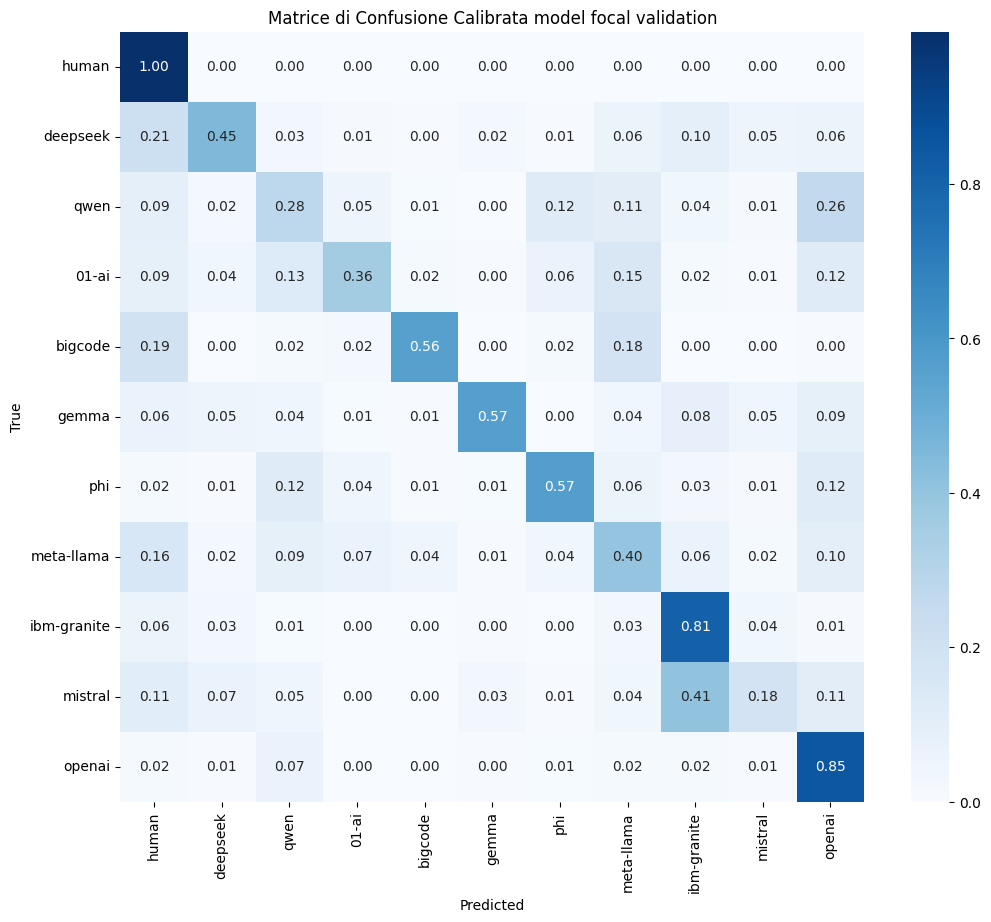

model focal on test set sample
              precision    recall  f1-score   support

           0     0.9258    1.0000    0.9615       474
           1     0.0690    0.0952    0.0800        21
           2     0.2500    0.1918    0.2171        73
           3     0.5294    0.4286    0.4737        21
           4     0.2000    0.2000    0.2000        10
           5     0.4286    0.4167    0.4225        36
           6     0.3250    0.2407    0.2766        54
           7     0.2041    0.1639    0.1818        61
           8     0.1053    0.3333    0.1600        18
           9     0.0000    0.0000    0.0000        18
          10     0.7586    0.6168    0.6804       214

    accuracy                         0.6770      1000
   macro avg     0.3451    0.3352    0.3321      1000
weighted avg     0.6813    0.6770    0.6749      1000



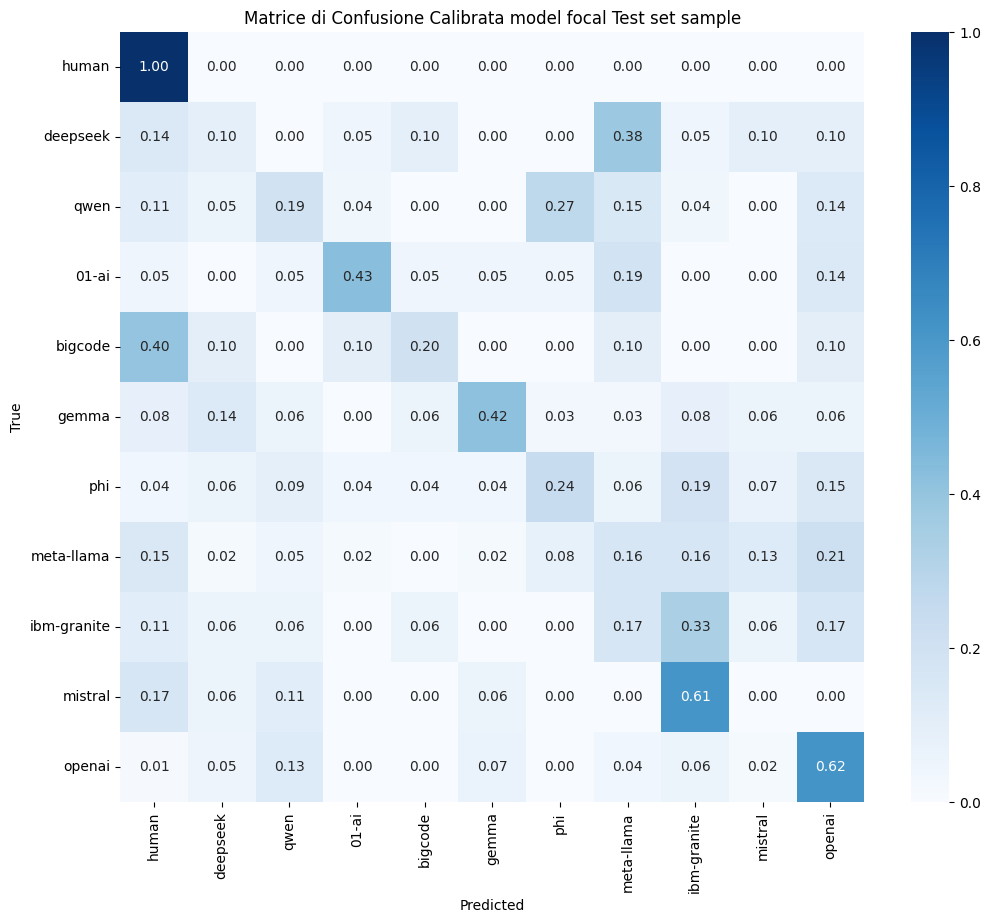

Saved final_test_predictions.npy


In [13]:
# model focal
# # Validation
p1 = np.load("probs/model_focal_val_probs.npy")

y  = np.load("logits/model_best_strategy_val_labels.npy")    #any model's label works since they are the same (no shuffle no sample drop)

p_val = p1 
preds_val = p_val.argmax(axis=1)

print("model focal on validation")
print(classification_report(y, preds_val, zero_division=0,digits=4))

labels = list(range(11))  # 0–10
class_names = ["human", "deepseek", "qwen", "01-ai", "bigcode", "gemma", "phi", "meta-llama", "ibm-granite", "mistral", "openai"]

cm = confusion_matrix(y, preds_val, labels=labels)
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice di Confusione Calibrata model focal validation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test
pt1 = np.load("probs/model_focal_test_probs.npy")

y_test = np.load("logits/model_best_strategy_test_labels.npy")

p_test = pt1
test_preds = p_test.argmax(axis=1)
print("model focal on test set sample")
print(classification_report(y_test, test_preds, zero_division=0,digits=4))

cm2 = confusion_matrix(y_test, test_preds, labels=labels)
cm2_norm = cm2.astype('float') / (cm2.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm2_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice di Confusione Calibrata model focal Test set sample")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

np.save("final_test_predictions.npy", test_preds)
print("Saved final_test_predictions.npy")

In [138]:
import numpy as np
from sklearn.metrics import f1_score, classification_report

def find_best_linear_ensemble(
    pt1, pt2, pt3, y_val,
    step=0.05,
    verbose=True
):
    """
    Grid search to maximize macro-F1.
    pt1 = focal
    pt2 = best strategy
    pt3 = m3
    """

    best_f1 = -1.0
    best_weights = None
    best_preds = None

    results = []

    for w1 in np.arange(0, 1 + 1e-9, step):
        for w2 in np.arange(0, 1 - w1 + 1e-9, step):
            w3 = 1.0 - w1 - w2
            if w3 < 0:
                continue

            p = w1 * pt1 + w2 * pt2 + w3 * pt3
            preds = p.argmax(axis=1)

            f1 = f1_score(y_val, preds, average="macro", zero_division=0)

            results.append((w1, w2, w3, f1))

            if f1 > best_f1:
                best_f1 = f1
                best_weights = (w1, w2, w3)
                best_preds = preds

    results = sorted(results, key=lambda x: x[3], reverse=True)

    if verbose:
        print(" best combination (val)")
        print(f"w1 (focal)        = {best_weights[0]:.2f}")
        print(f"w2 (best strat)   = {best_weights[1]:.2f}")
        print(f"w3 (m3)           = {best_weights[2]:.2f}")
        print(f"Macro F1 (val)    = {best_f1:.4f}")
        print()
        print(classification_report(y_val, best_preds, zero_division=0, digits=4))

        print("\n TOP 5")
        for w1, w2, w3, f1 in results[:5]:
            print(f"({w1:.2f}, {w2:.2f}, {w3:.2f}) -> F1={f1:.4f}")

    return {
        "best_weights": best_weights,
        "best_f1": best_f1,
        "best_preds": best_preds,
        "all_results": results
    }


In [ ]:
p1 = np.load("probs/model_focal_val_probs.npy")
p2 = np.load("probs/model_best_strategy_val_probs.npy")
p3 = np.load("probs/model3_val_probs.npy")
y_val = np.load("logits/model_best_strategy_val_labels.npy")

res = find_best_linear_ensemble(
    p1, p2, p3, y_val,
    step=0.02
)

 best combination (val)
w1 (focal)        = 0.18
w2 (best strat)   = 0.66
w3 (m3)           = 0.16
Macro F1 (val)    = 0.5859

              precision    recall  f1-score   support

           0     0.9885    0.9978    0.9932     88490
           1     0.6274    0.4711    0.5381       847
           2     0.4370    0.3578    0.3935      1755
           3     0.5180    0.3323    0.4049       650
           4     0.6957    0.5753    0.6298       445
           5     0.6981    0.5780    0.6324       372
           6     0.6688    0.5581    0.6085      1118
           7     0.5191    0.4094    0.4578      1695
           8     0.6549    0.8075    0.7232      1579
           9     0.4757    0.2514    0.3289       895
          10     0.6474    0.8491    0.7347      2154

    accuracy                         0.9466    100000
   macro avg     0.6300    0.5625    0.5859    100000
weighted avg     0.9416    0.9466    0.9428    100000


 TOP 5
(0.18, 0.66, 0.16) -> F1=0.5859
(0.20, 0.64, 0.16) -

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def find_best_ensemble_best_m3(
    p_best, p_m3, y_val, step=0.05
):
    """
    Grid search on validation.
    Ensemble: w * best_strategy + (1 - w) * m3
    """

    best_f1 = -1.0
    best_w = None

    for w in np.arange(0, 1 + 1e-9, step):
        p = w * p_best + (1 - w) * p_m3
        preds = p.argmax(axis=1)

        f1 = f1_score(y_val, preds, average="macro", zero_division=0)

        if f1 > best_f1:
            best_f1 = f1
            best_w = w

    print(" validation grid search (best + m3) ")
    print(f"Best weight best_strategy: {best_w:.2f}")
    print(f"Best weight m3: {1 - best_w:.2f}")
    print(f"Macro F1 (val): {best_f1:.4f}")

    return best_w, best_f1


In [ ]:
import os
from pathlib import Path
p = Path("probs/model_focal_val_probs.npy")
print("cwd:", Path.cwd())
print("resolved:", p.resolve())
print("exists:", p.exists())

cwd: d:\Azaze\Università\Versione mia LLM\Progetto LLM4SE\SemEval-2026-Task13\task_B
resolved: D:\Azaze\Università\Versione mia LLM\Progetto LLM4SE\SemEval-2026-Task13\task_B\Progetto LLM4SE\SemEval-2026-Task13\task_B\probs\model_focal_val_probs.npy
exists: False


focal model+ best model + model3 validation
              precision    recall  f1-score   support

           0     0.9885    0.9978    0.9932     88490
           1     0.6274    0.4711    0.5381       847
           2     0.4370    0.3578    0.3935      1755
           3     0.5180    0.3323    0.4049       650
           4     0.6957    0.5753    0.6298       445
           5     0.6981    0.5780    0.6324       372
           6     0.6688    0.5581    0.6085      1118
           7     0.5191    0.4094    0.4578      1695
           8     0.6549    0.8075    0.7232      1579
           9     0.4757    0.2514    0.3289       895
          10     0.6474    0.8491    0.7347      2154

    accuracy                         0.9466    100000
   macro avg     0.6300    0.5625    0.5859    100000
weighted avg     0.9416    0.9466    0.9428    100000



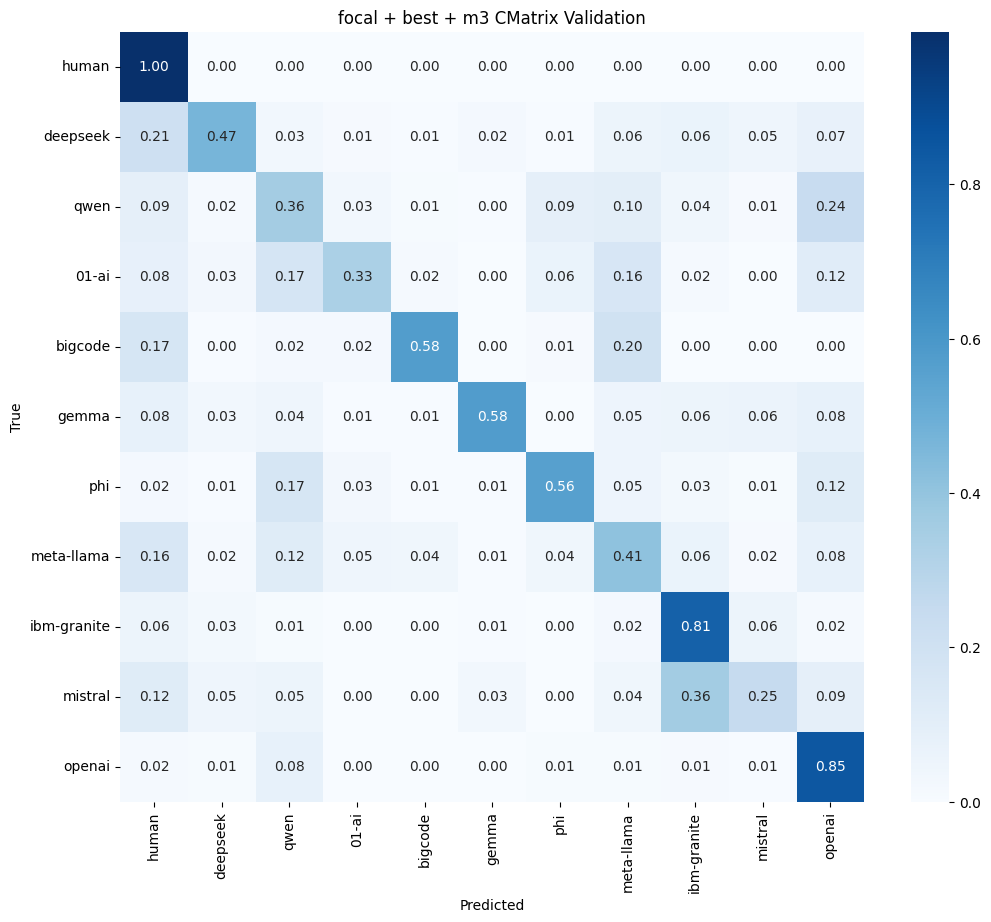

focal model+ best model + model3 test set sample
              precision    recall  f1-score   support

           0     0.9168    1.0000    0.9566       474
           1     0.0571    0.0952    0.0714        21
           2     0.2769    0.2466    0.2609        73
           3     0.4375    0.3333    0.3784        21
           4     0.2727    0.3000    0.2857        10
           5     0.4783    0.3056    0.3729        36
           6     0.3000    0.1667    0.2143        54
           7     0.1622    0.0984    0.1224        61
           8     0.1333    0.3333    0.1905        18
           9     0.1250    0.1667    0.1429        18
          10     0.7766    0.7150    0.7445       214

    accuracy                         0.6920      1000
   macro avg     0.3579    0.3419    0.3400      1000
weighted avg     0.6821    0.6920    0.6826      1000



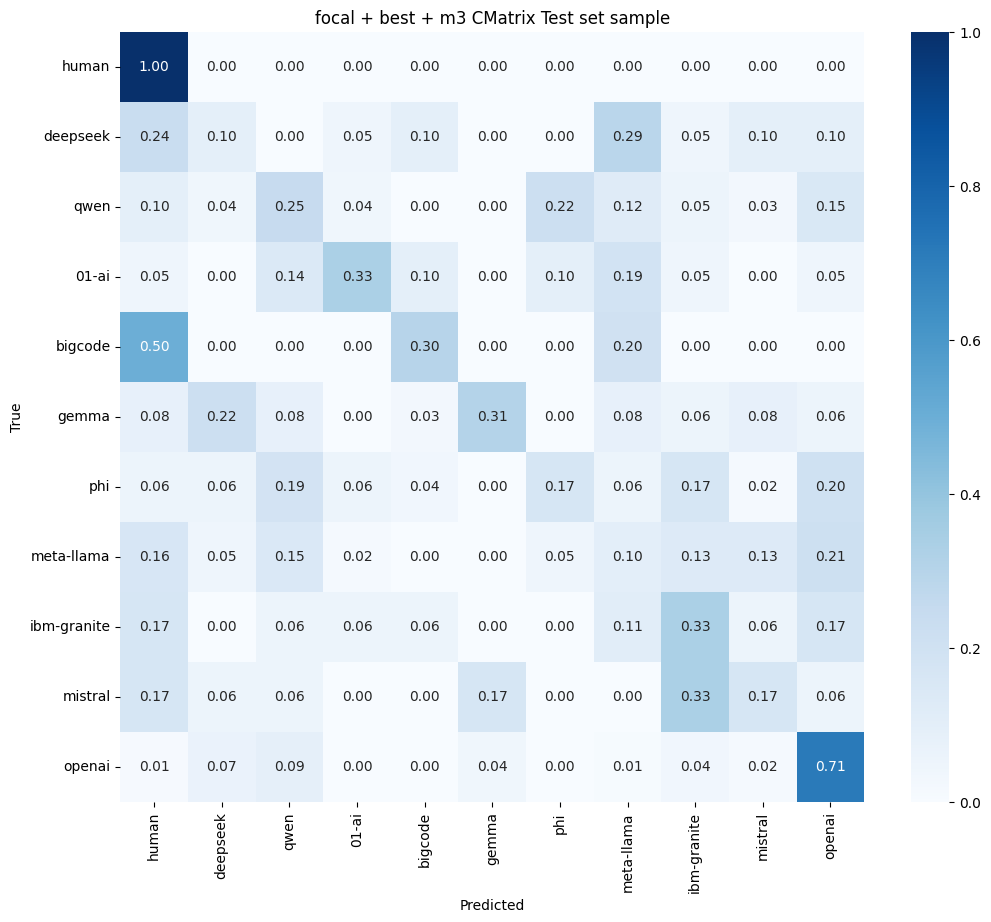

Saved final_test_predictions.npy


In [14]:
# model focal + best strategy + model3 (best weights in grid search)
# # Validation

p1 = np.load("probs/model_focal_val_probs.npy")
p2 = np.load("probs/model_best_strategy_val_probs.npy")
p3 = np.load("probs/model3_val_probs.npy")
y  = np.load("logits/model_best_strategy_val_labels.npy")

p_val = (0.18*p1 + 0.66*p2 + 0.16*p3) 
preds_val = p_val.argmax(axis=1)

print("focal model+ best model + model3 validation")
print(classification_report(y, preds_val, zero_division=0,digits=4))

labels = list(range(11))  # 0–10
class_names = ["human", "deepseek", "qwen", "01-ai", "bigcode", "gemma", "phi", "meta-llama", "ibm-granite", "mistral", "openai"]

cm = confusion_matrix(y, preds_val, labels=labels)
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("focal + best + m3 CMatrix Validation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test
pt1 = np.load("probs/model_focal_test_probs.npy")
pt2 = np.load("probs/model_best_strategy_test_probs.npy")
pt3 = np.load("probs/model3_test_probs.npy")
y_test = np.load("logits/model_best_strategy_test_labels.npy")

p_test = (0.18*pt1 + 0.66*pt2 + 0.16*pt3)
test_preds = p_test.argmax(axis=1)
print("focal model+ best model + model3 test set sample")
print(classification_report(y_test, test_preds, zero_division=0,digits=4))

cm2 = confusion_matrix(y_test, test_preds, labels=labels)
cm2_norm = cm2.astype('float') / (cm2.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm2_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("focal + best + m3 CMatrix Test set sample")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

np.save("final_test_predictions.npy", test_preds)
print("Saved final_test_predictions.npy")

model 'best_strategy' + model3 on validation
              precision    recall  f1-score   support

           0     0.9705    0.9987    0.9844     88490
           1     0.7074    0.3140    0.4350       847
           2     0.4156    0.2524    0.3141      1755
           3     0.6182    0.2092    0.3126       650
           4     0.7375    0.5303    0.6170       445
           5     0.7539    0.5188    0.6146       372
           6     0.6296    0.5626    0.5942      1118
           7     0.5624    0.3086    0.3985      1695
           8     0.6350    0.7568    0.6906      1579
           9     0.4796    0.1575    0.2372       895
          10     0.6210    0.7479    0.6786      2154

    accuracy                         0.9375    100000
   macro avg     0.6482    0.4870    0.5343    100000
weighted avg     0.9264    0.9375    0.9284    100000



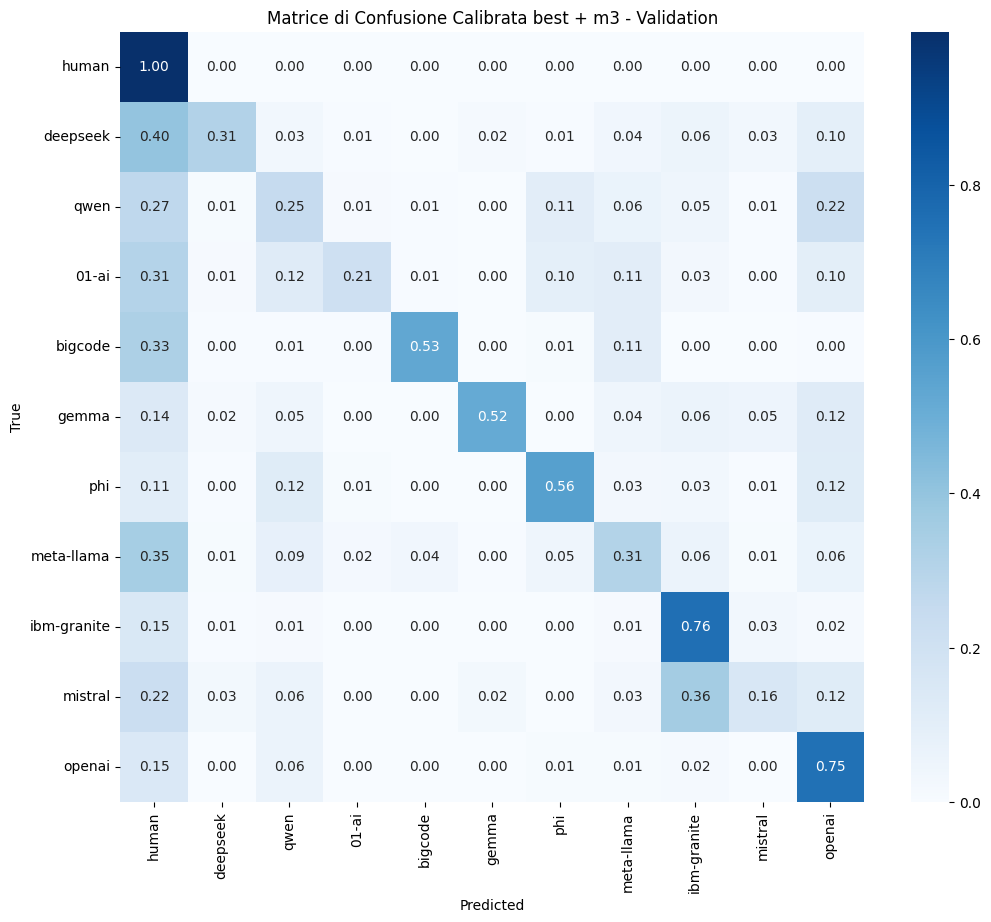

model 'best_strategy' + model3 on test set sample
              precision    recall  f1-score   support

           0     0.8510    1.0000    0.9195       474
           1     0.0741    0.0952    0.0833        21
           2     0.2766    0.1781    0.2167        73
           3     0.5833    0.3333    0.4242        21
           4     0.2857    0.2000    0.2353        10
           5     0.5238    0.3056    0.3860        36
           6     0.3429    0.2222    0.2697        54
           7     0.2000    0.0820    0.1163        61
           8     0.1277    0.3333    0.1846        18
           9     0.2143    0.1667    0.1875        18
          10     0.7933    0.7710    0.7820       214

    accuracy                         0.7000      1000
   macro avg     0.3884    0.3352    0.3459      1000
weighted avg     0.6657    0.7000    0.6743      1000



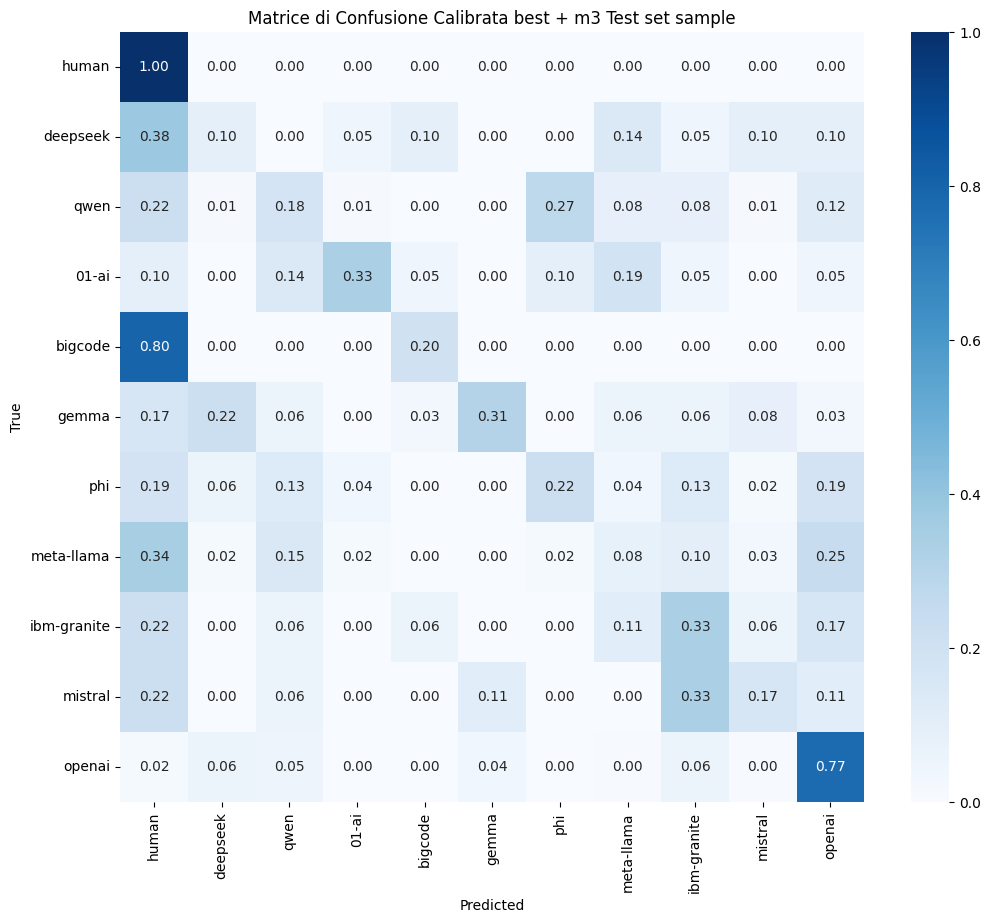

Saved final_test_predictions.npy


In [16]:
# best strategy +m3 #  migliore risultato 
# # Validation

p2 = np.load("probs/model_best_strategy_val_probs.npy")
p3 = np.load("probs/model3_val_probs.npy")
y  = np.load("logits/model_best_strategy_val_labels.npy")

p_val = (p2 + p3) / 2
preds_val = p_val.argmax(axis=1)

print("model 'best_strategy' + model3 on validation")
print(classification_report(y, preds_val, zero_division=0,digits=4))

labels = list(range(11))  # 0–10
class_names = ["human", "deepseek", "qwen", "01-ai", "bigcode", "gemma", "phi", "meta-llama", "ibm-granite", "mistral", "openai"]

cm = confusion_matrix(y, preds_val, labels=labels)
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice di Confusione Calibrata best + m3 - Validation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test

pt2 = np.load("probs/model_best_strategy_test_probs.npy")
pt3 = np.load("probs/model3_test_probs.npy")
y_test = np.load("logits/model_best_strategy_test_labels.npy")

p_test = (pt2 + pt3) / 2
test_preds = p_test.argmax(axis=1)
print("model 'best_strategy' + model3 on test set sample")
print(classification_report(y_test, test_preds, zero_division=0,digits=4))

cm2 = confusion_matrix(y_test, test_preds, labels=labels)
cm2_norm = cm2.astype('float') / (cm2.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm2_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice di Confusione Calibrata best + m3 Test set sample")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

np.save("final_test_predictions.npy", test_preds)
print("Saved final_test_predictions.npy")

model best (single) on validation
              precision    recall  f1-score   support

           0     0.9898    0.9963    0.9930     88490
           1     0.5930    0.4817    0.5316       847
           2     0.4171    0.3772    0.3962      1755
           3     0.4886    0.3308    0.3945       650
           4     0.7025    0.5730    0.6312       445
           5     0.6656    0.5726    0.6156       372
           6     0.6736    0.5242    0.5895      1118
           7     0.4972    0.4195    0.4550      1695
           8     0.6537    0.7853    0.7135      1579
           9     0.4158    0.2760    0.3318       895
          10     0.6516    0.8301    0.7301      2154

    accuracy                         0.9449    100000
   macro avg     0.6135    0.5606    0.5802    100000
weighted avg     0.9411    0.9449    0.9421    100000



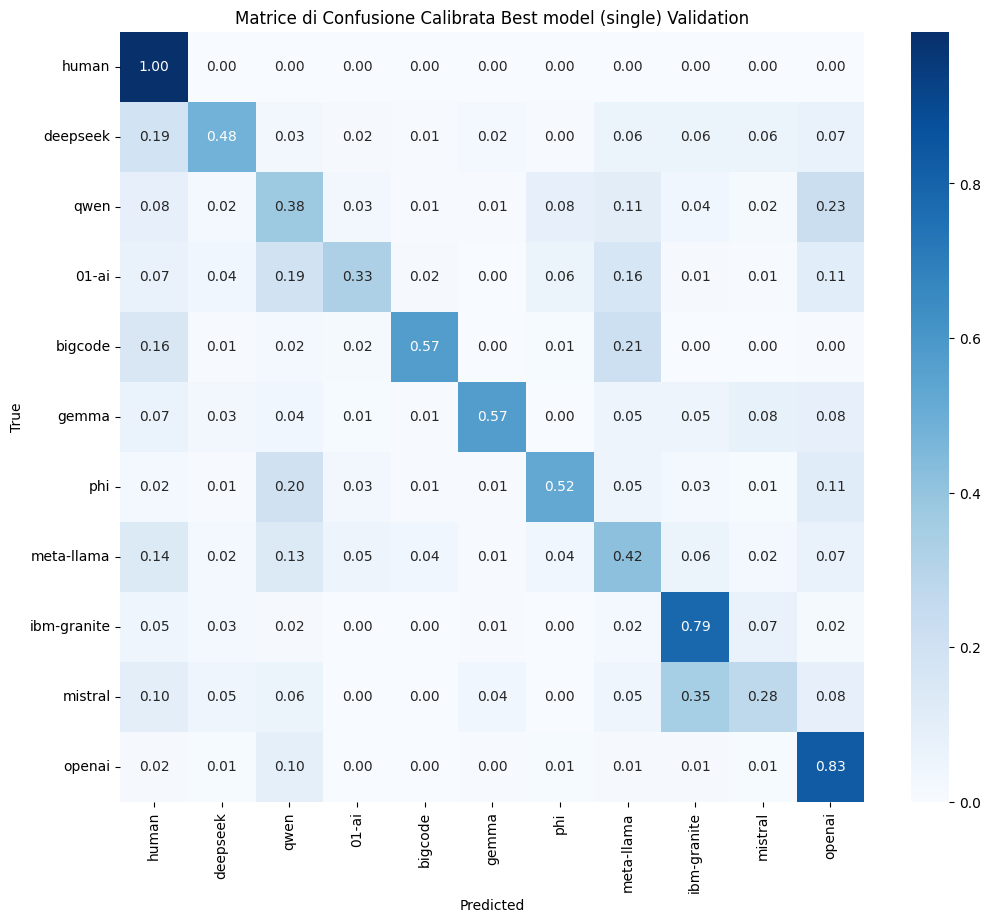

model best (single) on test set sample
              precision    recall  f1-score   support

           0     0.9238    0.9979    0.9594       474
           1     0.0541    0.0952    0.0690        21
           2     0.2973    0.3014    0.2993        73
           3     0.3684    0.3333    0.3500        21
           4     0.2308    0.3000    0.2609        10
           5     0.4074    0.3056    0.3492        36
           6     0.3462    0.1667    0.2250        54
           7     0.1176    0.0656    0.0842        61
           8     0.1538    0.3333    0.2105        18
           9     0.1071    0.1667    0.1304        18
          10     0.7801    0.6963    0.7358       214

    accuracy                         0.6890      1000
   macro avg     0.3442    0.3420    0.3340      1000
weighted avg     0.6830    0.6890    0.6815      1000



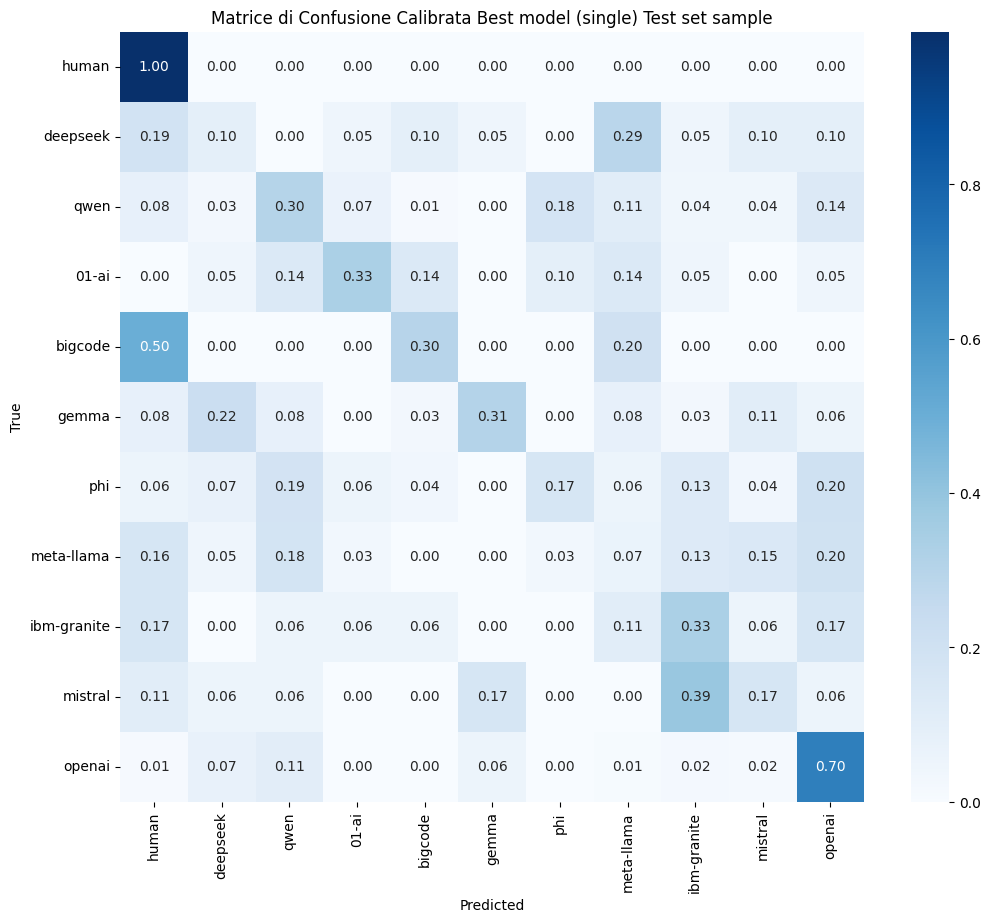

Saved final_test_predictions.npy


In [17]:
# best strategy model
# # Validation
p2 = np.load("probs/model_best_strategy_val_probs.npy")
y  = np.load("logits/model_best_strategy_val_labels.npy")

p_val = (p2) 
preds_val = p_val.argmax(axis=1)

print("model best (single) on validation")
print(classification_report(y, preds_val, zero_division=0,digits=4))

labels = list(range(11))  # 0–10
class_names = ["human", "deepseek", "qwen", "01-ai", "bigcode", "gemma", "phi", "meta-llama", "ibm-granite", "mistral", "openai"]

cm = confusion_matrix(y, preds_val, labels=labels)
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice di Confusione Calibrata Best model (single) Validation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test
pt2 = np.load("probs/model_best_strategy_test_probs.npy")
y_test = np.load("logits/model_best_strategy_test_labels.npy")

p_test = (pt2) 
test_preds = p_test.argmax(axis=1)
print("model best (single) on test set sample")
print(classification_report(y_test, test_preds, zero_division=0,digits=4))

cm2 = confusion_matrix(y_test, test_preds, labels=labels)
cm2_norm = cm2.astype('float') / (cm2.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm2_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice di Confusione Calibrata Best model (single) Test set sample")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

np.save("final_test_predictions.npy", test_preds)
print("Saved final_test_predictions.npy")

m3 (single) on validation
              precision    recall  f1-score   support

           0     0.9561    0.9932    0.9743     88490
           1     0.5238    0.0519    0.0945       847
           2     0.2641    0.1305    0.1747      1755
           3     0.5638    0.0815    0.1425       650
           4     0.5556    0.3483    0.4282       445
           5     0.5104    0.1317    0.2094       372
           6     0.5024    0.4750    0.4883      1118
           7     0.3460    0.1504    0.2097      1695
           8     0.4281    0.6219    0.5071      1579
           9     0.1724    0.0056    0.0108       895
          10     0.4246    0.5019    0.4600      2154

    accuracy                         0.9127    100000
   macro avg     0.4770    0.3174    0.3363    100000
weighted avg     0.8921    0.9127    0.8967    100000



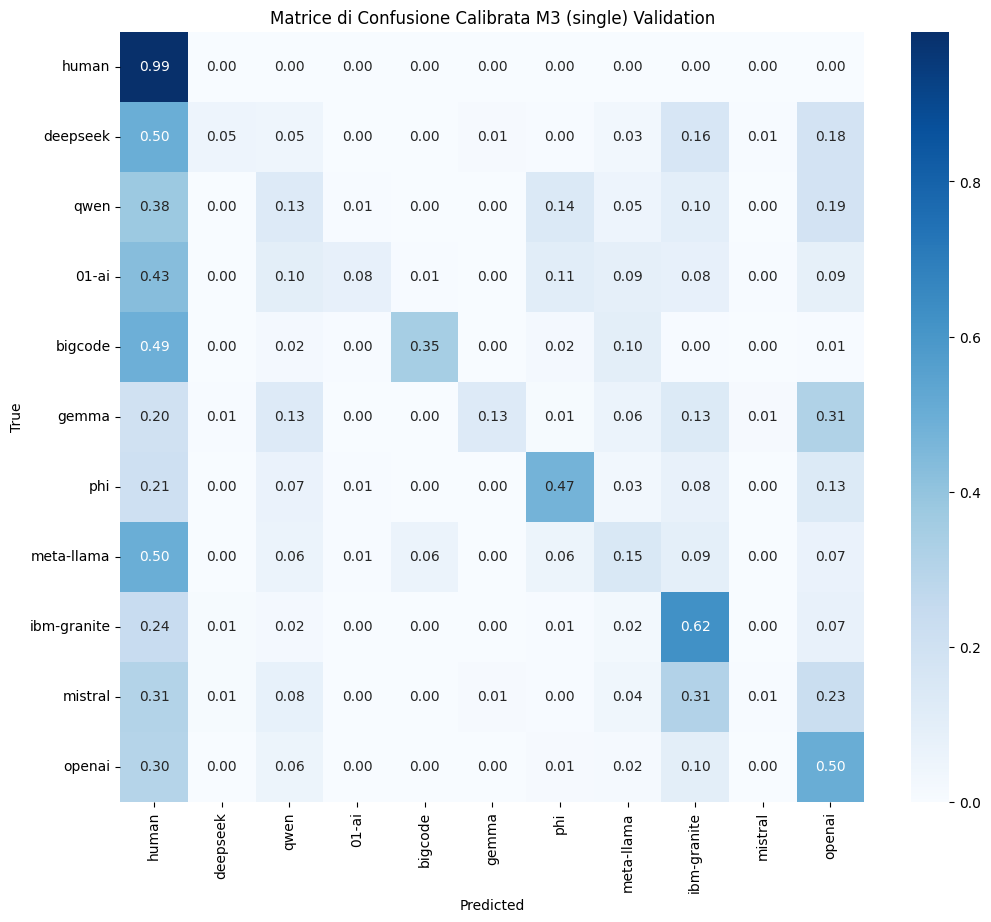

m3 (single) on test set sample
              precision    recall  f1-score   support

           0     0.8079    0.9937    0.8912       474
           1     0.0000    0.0000    0.0000        21
           2     0.0444    0.0274    0.0339        73
           3     0.6667    0.1905    0.2963        21
           4     0.0000    0.0000    0.0000        10
           5     0.2000    0.0278    0.0488        36
           6     0.2667    0.2222    0.2424        54
           7     0.2105    0.0656    0.1000        61
           8     0.0864    0.3889    0.1414        18
           9     0.0000    0.0000    0.0000        18
          10     0.7184    0.6916    0.7048       214

    accuracy                         0.6490      1000
   macro avg     0.2728    0.2371    0.2235      1000
weighted avg     0.5899    0.6490    0.6054      1000



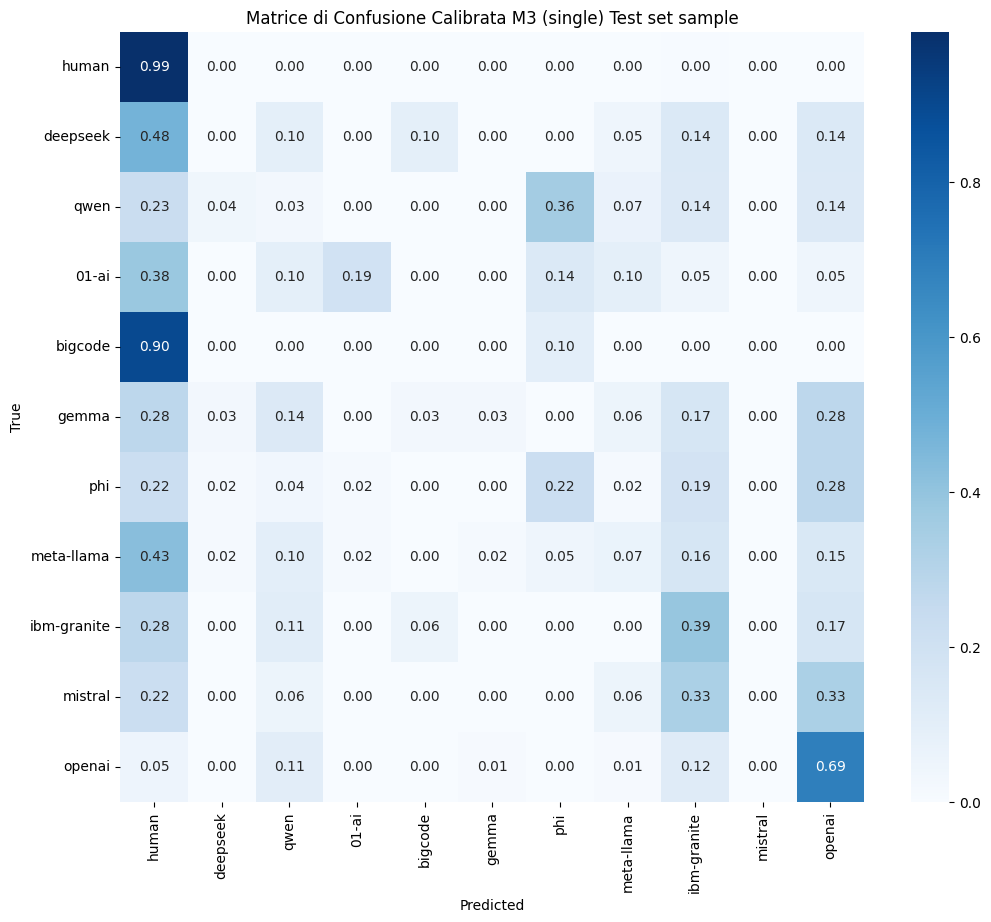

Saved final_test_predictions.npy


In [18]:
# m3
# # Validation

p3 = np.load("probs/model3_val_probs.npy")
y  = np.load("logits/model_best_strategy_val_labels.npy")

p_val = (p3) 
preds_val = p_val.argmax(axis=1)

print("m3 (single) on validation")
print(classification_report(y, preds_val, zero_division=0,digits=4))

labels = list(range(11))  # 0–10
class_names = ["human", "deepseek", "qwen", "01-ai", "bigcode", "gemma", "phi", "meta-llama", "ibm-granite", "mistral", "openai"]

cm = confusion_matrix(y, preds_val, labels=labels)
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice di Confusione Calibrata M3 (single) Validation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test

pt3 = np.load("probs/model3_test_probs.npy")
y_test = np.load("logits/model_best_strategy_test_labels.npy")

p_test = (pt3) 
test_preds = p_test.argmax(axis=1)
print("m3 (single) on test set sample")
print(classification_report(y_test, test_preds, zero_division=0,digits=4))

cm2 = confusion_matrix(y_test, test_preds, labels=labels)
cm2_norm = cm2.astype('float') / (cm2.sum(axis=1)[:, np.newaxis] + 1e-9)

plt.figure(figsize=(12, 10))
sns.heatmap(cm2_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice di Confusione Calibrata M3 (single) Test set sample")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

np.save("final_test_predictions.npy", test_preds)
print("Saved final_test_predictions.npy")